In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data=pd.read_csv("train.csv")
sample = pd.read_csv("sample_submission.csv")
cible = pd.read_csv("train_target_and_scores.csv")
data_test = pd.read_csv("test.csv")

C:\Users\lodia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
data.head()

id target     home_team_name         away_team_name  \
0  11906497   away  Newell's Old Boys            River Plate   
1  11984383   home        Real Estelí  Deportivo Las Sabanas   
2  11983301   draw              UPNFM               Marathón   
3  11983471   away               León                Morelia   
4  11883005   home     Cobán Imperial                 Iztapa   

            match_date       league_name  league_id is_cup  \
0  2019-12-01 00:45:00         Superliga        636  False   
1  2019-12-01 01:00:00  Primera Division        752  False   
2  2019-12-01 01:00:00     Liga Nacional        734  False   
3  2019-12-01 01:00:00           Liga MX        743  False   
4  2019-12-01 01:00:00     Liga Nacional        705  False   

   home_team_coach_id  away_team_coach_id home_team_history_match_date_1  \
0            468196.0            468200.0            2019-11-26 00:10:00   
1            516788.0          22169161.0            2019-11-27 21:00:00   
2           2510608.0            456313.0            2019-11-28 01:15:00   
3           1552508.0            465797.0            2019-11-28 01:00:00   
4            429958.0            426870.0            2019-11-27 18:00:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2019-11-10 18:30:00            2019-11-03 18:30:00   
1            2019-11-24 01:00:00            2019-11-10 01:00:00   
2            2019-11-21 01:30:00            2019-11-03 21:30:00   
3            2019-11-23 03:10:00            2019-11-10 03:00:00   
4            2019-11-24 01:00:00            2019-11-10 02:00:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2019-10-29 22:10:00            2019-10-19 20:45:00   
1            2019-11-02 21:30:00            2019-10-27 01:00:00   
2            2019-10-27 01:00:00            2019-10-20 22:00:00   
3            2019-11-04 02:00:00            2019-11-01 03:00:00   
4            2019-11-03 01:00:00            2019-10-27 20:30:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2019-10-04 22:00:00            2019-09-28 23:00:00   
1            2019-10-24 01:00:00            2019-10-21 00:00:00   
2            2019-10-17 01:00:00            2019-10-05 21:00:00   
3            2019-10-27 01:00:00            2019-10-20 17:00:00   
4            2019-10-24 00:00:00            2019-10-20 18:00:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2019-09-22 14:00:00            2019-09-15 18:30:00   
1            2019-10-18 01:00:00            2019-10-06 01:00:00   
2            2019-09-29 01:00:00            2019-09-22 22:00:00   
3            2019-10-05 22:00:00            2019-09-28 00:00:00   
4            2019-10-06 17:00:00            2019-10-02 21:30:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2019-09-01 16:15:00                               0.0   
1             2019-09-29 21:00:00                               1.0   
2             2019-09-19 01:00:00                               0.0   
3             2019-09-25 02:00:00                               0.0   
4             2019-09-29 01:00:00                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               1.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                       

In [3]:
data.shape

(110938, 190)

# Cleaning and preparing data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110938 entries, 0 to 110937
Columns: 190 entries, id to away_team_history_league_id_10
dtypes: float64(162), int64(2), object(26)
memory usage: 160.8+ MB


In [5]:
data.isnull().sum()* 100/len(data)

id                                       0.000000
target                                   0.000000
home_team_name                           0.000901
away_team_name                           0.000901
match_date                               0.000000
league_name                              0.000901
league_id                                0.000000
is_cup                                   0.000901
home_team_coach_id                      19.579405
away_team_coach_id                      19.664137
home_team_history_match_date_1           1.044728
home_team_history_match_date_2           2.209342
home_team_history_match_date_3           3.400999
home_team_history_match_date_4           4.598064
home_team_history_match_date_5           5.838396
home_team_history_match_date_6           7.117489
home_team_history_match_date_7           8.378554
home_team_history_match_date_8           9.662154
home_team_history_match_date_9          10.939444
home_team_history_match_date_10         12.222142


In [6]:
data.dtypes

id                                        int64
target                                   object
home_team_name                           object
away_team_name                           object
match_date                               object
league_name                              object
league_id                                 int64
is_cup                                   object
home_team_coach_id                      float64
away_team_coach_id                      float64
home_team_history_match_date_1           object
home_team_history_match_date_2           object
home_team_history_match_date_3           object
home_team_history_match_date_4           object
home_team_history_match_date_5           object
home_team_history_match_date_6           object
home_team_history_match_date_7           object
home_team_history_match_date_8           object
home_team_history_match_date_9           object
home_team_history_match_date_10          object
home_team_history_is_play_home_1        

In [7]:
data.head(3)

id target     home_team_name         away_team_name  \
0  11906497   away  Newell's Old Boys            River Plate   
1  11984383   home        Real Estelí  Deportivo Las Sabanas   
2  11983301   draw              UPNFM               Marathón   

            match_date       league_name  league_id is_cup  \
0  2019-12-01 00:45:00         Superliga        636  False   
1  2019-12-01 01:00:00  Primera Division        752  False   
2  2019-12-01 01:00:00     Liga Nacional        734  False   

   home_team_coach_id  away_team_coach_id home_team_history_match_date_1  \
0            468196.0            468200.0            2019-11-26 00:10:00   
1            516788.0          22169161.0            2019-11-27 21:00:00   
2           2510608.0            456313.0            2019-11-28 01:15:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2019-11-10 18:30:00            2019-11-03 18:30:00   
1            2019-11-24 01:00:00            2019-11-10 01:00:00   
2            2019-11-21 01:30:00            2019-11-03 21:30:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2019-10-29 22:10:00            2019-10-19 20:45:00   
1            2019-11-02 21:30:00            2019-10-27 01:00:00   
2            2019-10-27 01:00:00            2019-10-20 22:00:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2019-10-04 22:00:00            2019-09-28 23:00:00   
1            2019-10-24 01:00:00            2019-10-21 00:00:00   
2            2019-10-17 01:00:00            2019-10-05 21:00:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2019-09-22 14:00:00            2019-09-15 18:30:00   
1            2019-10-18 01:00:00            2019-10-06 01:00:00   
2            2019-09-29 01:00:00            2019-09-22 22:00:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2019-09-01 16:15:00                               0.0   
1             2019-09-29 21:00:00                               1.0   
2             2019-09-19 01:00:00                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         0.0   
1                                0.0                         0.0   
2                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                        

In [8]:
data['home_team_name']= data['home_team_name'].replace(np.nan, "Al Ittihad")
data['away_team_name']= data['away_team_name'].replace(np.nan, "Al Ittihad")
data['league_name']= data['league_name'].replace(np.nan, "Premier League")
data['is_cup']= data['is_cup'].replace(np.nan, "False")
data['home_team_coach_id']= data['home_team_coach_id'].replace(np.nan, 37252510.0)
data['away_team_coach_id']= data['away_team_coach_id'].replace(np.nan, 37252510.0)
data['home_team_history_match_date_1']= data['home_team_history_match_date_1'].replace(np.nan, "2020-09-19 14:00:00")
data['home_team_history_match_date_2']= data['home_team_history_match_date_2'].replace(np.nan, "2020-09-19 14:00:00")
data['home_team_history_match_date_3']= data['home_team_history_match_date_3'].replace(np.nan, "2020-09-19 14:00:00")
data['home_team_history_match_date_4']= data['home_team_history_match_date_4'].replace(np.nan, "2020-09-19 14:00:00")
data['home_team_history_match_date_5']= data['home_team_history_match_date_5'].replace(np.nan, "2020-03-07 15:00:00")
data['home_team_history_match_date_6']= data['home_team_history_match_date_6'].replace(np.nan, "2020-03-07 15:00:00")
data['home_team_history_match_date_7']= data['home_team_history_match_date_7'].replace(np.nan, "2020-02-22 15:00:00")
data['home_team_history_match_date_8']= data['home_team_history_match_date_8'].replace(np.nan, "2019-12-07 15:00:00")
data['home_team_history_match_date_9']= data['home_team_history_match_date_9'].replace(np.nan, "2020-03-07 15:00:00")
data['home_team_history_match_date_10']= data['home_team_history_match_date_10'].replace(np.nan, "2019-10-19 14:00:00")
data['home_team_history_is_play_home_1']= data['home_team_history_is_play_home_1'].replace(np.nan, 0.0)
data['home_team_history_is_play_home_2']= data['home_team_history_is_play_home_2'].replace(np.nan, 1.0)
data['home_team_history_is_play_home_3']= data['home_team_history_is_play_home_3'].replace(np.nan, 0.0)
data['home_team_history_is_play_home_4']= data['home_team_history_is_play_home_4'].replace(np.nan, 1.0)
data['home_team_history_is_play_home_5']= data['home_team_history_is_play_home_5'].replace(np.nan, 0.0)
data['home_team_history_is_play_home_6']= data['home_team_history_is_play_home_6'].replace(np.nan, 1.0)
data['home_team_history_is_play_home_7']= data['home_team_history_is_play_home_7'].replace(np.nan, 0.0)
data['home_team_history_is_play_home_8']= data['home_team_history_is_play_home_8'].replace(np.nan, 1.0)
data['home_team_history_is_play_home_9']= data['home_team_history_is_play_home_9'].replace(np.nan, 1.0)
data['home_team_history_is_play_home_10']= data['home_team_history_is_play_home_10'].replace(np.nan, 0.0)
data['home_team_history_is_cup_1']= data['home_team_history_is_cup_1'].replace(np.nan, 0.0)
data['home_team_history_is_cup_2']= data['home_team_history_is_cup_2'].replace(np.nan, 0.0)
data['home_team_history_is_cup_3']= data['home_team_history_is_cup_3'].replace(np.nan, 0.0)
data['home_team_history_is_cup_4']= data['home_team_history_is_cup_4'].replace(np.nan, 0.0)
data['home_team_history_is_cup_5']= data['home_team_history_is_cup_5'].replace(np.nan, 0.0)
data['home_team_history_is_cup_6']= data['home_team_history_is_cup_6'].replace(np.nan, 0.0)
data['home_team_history_is_cup_7']= data['home_team_history_is_cup_7'].replace(np.nan, 0.0)
data['home_team_history_is_cup_8']= data['home_team_history_is_cup_8'].replace(np.nan, 0.0)
data['home_team_history_is_cup_9']= data['home_team_history_is_cup_9'].replace(np.nan, 0.0)
data['home_team_history_is_cup_10']= data['home_team_history_is_cup_10'].replace(np.nan, 0.0)
data['home_team_history_goal_1']= data['home_team_history_goal_1'].replace(np.nan, 0.0)
data['home_team_history_goal_2']= data['home_team_history_goal_2'].replace(np.nan, 0.0)
data['home_team_history_goal_3']= data['home_team_history_goal_3'].replace(np.nan, 0.0)
data['home_team_history_goal_4']= data['home_team_history_goal_4'].replace(np.nan, 0.0)
data['home_team_history_goal_5']= data['home_team_history_goal_5'].replace(np.nan, 0.0)
data['home_team_history_goal_6']= data['home_team_history_goal_6'].replace(np.nan, 0.0)
data['home_team_history_goal_7']= data['home_team_history_goal_7'].replace(np.nan, 0.0)
data['home_team_history_goal_8']= data['home_team_history_goal_8'].replace(np.nan, 0.0)
data['home_team_history_goal_9']= data['home_team_history_goal_9'].replace(np.nan, 0.0)
data['home_team_history_goal_10']= data['home_team_history_goal_10'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_1']= data['home_team_history_opponent_goal_1'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_2']= data['home_team_history_opponent_goal_2'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_3']= data['home_team_history_opponent_goal_3'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_4']= data['home_team_history_opponent_goal_4'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_5']= data['home_team_history_opponent_goal_5'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_6']= data['home_team_history_opponent_goal_6'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_7']= data['home_team_history_opponent_goal_7'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_8']= data['home_team_history_opponent_goal_8'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_9']= data['home_team_history_opponent_goal_9'].replace(np.nan, 0.0)
data['home_team_history_opponent_goal_10']= data['home_team_history_opponent_goal_10'].replace(np.nan, 0.0)
data['home_team_history_rating_1']= data['home_team_history_rating_1'].replace(np.nan, 5.0)
data['home_team_history_rating_2']= data['home_team_history_rating_2'].replace(np.nan, 5.0)
data['home_team_history_rating_3']= data['home_team_history_rating_3'].replace(np.nan, 5.0)
data['home_team_history_rating_4']= data['home_team_history_rating_4'].replace(np.nan, 5.8447)
data['home_team_history_rating_5']= data['home_team_history_rating_5'].replace(np.nan, 5.8447)
data['home_team_history_rating_6']= data['home_team_history_rating_6'].replace(np.nan, 5.0)
data['home_team_history_rating_7']= data['home_team_history_rating_7'].replace(np.nan, 5.8447)
data['home_team_history_rating_8']= data['home_team_history_rating_8'].replace(np.nan, 5.8447)
data['home_team_history_rating_9']= data['home_team_history_rating_9'].replace(np.nan, 5.8447)
data['home_team_history_rating_10']= data['home_team_history_rating_10'].replace(np.nan, 5.0)
data['home_team_history_opponent_rating_1']= data['home_team_history_opponent_rating_1'].replace(np.nan, 5.0)
data['home_team_history_opponent_rating_2']= data['home_team_history_opponent_rating_2'].replace(np.nan, 5.0)
data['home_team_history_opponent_rating_3']= data['home_team_history_opponent_rating_3'].replace(np.nan, 5.0)
data['home_team_history_opponent_rating_4']= data['home_team_history_opponent_rating_4'].replace(np.nan, 5.8447)
data['home_team_history_opponent_rating_5']= data['home_team_history_opponent_rating_5'].replace(np.nan, 5.8447)
data['home_team_history_opponent_rating_6']= data['home_team_history_opponent_rating_6'].replace(np.nan, 5.0)
data['home_team_history_opponent_rating_7']= data['home_team_history_opponent_rating_7'].replace(np.nan, 5.8447)
data['home_team_history_opponent_rating_8']= data['home_team_history_opponent_rating_8'].replace(np.nan, 5.8447)
data['home_team_history_opponent_rating_9']= data['home_team_history_opponent_rating_9'].replace(np.nan, 5.8447)
data['home_team_history_opponent_rating_10']= data['home_team_history_opponent_rating_10'].replace(np.nan, 5.0)
data['home_team_history_coach_1']= data['home_team_history_coach_1'].replace(np.nan, 37252510.0)
data['home_team_history_coach_2']= data['home_team_history_coach_2'].replace(np.nan, 37252510.0)
data['home_team_history_coach_3']= data['home_team_history_coach_3'].replace(np.nan, 37252510.0)
data['home_team_history_coach_4']= data['home_team_history_coach_4'].replace(np.nan, 37252510.0)
data['home_team_history_coach_5']= data['home_team_history_coach_5'].replace(np.nan, 37252510.0)
data['home_team_history_coach_6']= data['home_team_history_coach_6'].replace(np.nan, 37252510.0)
data['home_team_history_coach_7']= data['home_team_history_coach_7'].replace(np.nan, 37252510.0)
data['home_team_history_coach_8']= data['home_team_history_coach_8'].replace(np.nan, 37252510.0)
data['home_team_history_coach_9']= data['home_team_history_coach_9'].replace(np.nan, 37252510.0)
data['home_team_history_coach_10']= data['home_team_history_coach_10'].replace(np.nan, 37252510.0)
data['home_team_history_league_id_1']= data['home_team_history_league_id_1'].replace(np.nan, 1101.0)
data['home_team_history_league_id_2']= data['home_team_history_league_id_2'].replace(np.nan, 1101.0)
data['home_team_history_league_id_3']= data['home_team_history_league_id_3'].replace(np.nan, 1101.0)
data['home_team_history_league_id_4']= data['home_team_history_league_id_4'].replace(np.nan, 1101.0)
data['home_team_history_league_id_5']= data['home_team_history_league_id_5'].replace(np.nan, 1101.0)
data['home_team_history_league_id_6']= data['home_team_history_league_id_6'].replace(np.nan, 1101.0)
data['home_team_history_league_id_7']= data['home_team_history_league_id_7'].replace(np.nan, 1101.0)
data['home_team_history_league_id_8']= data['home_team_history_league_id_8'].replace(np.nan, 1101.0)
data['home_team_history_league_id_9']= data['home_team_history_league_id_9'].replace(np.nan, 1101.0)
data['home_team_history_league_id_10']= data['home_team_history_league_id_10'].replace(np.nan, 1101.0)
data['away_team_history_match_date_1']= data['away_team_history_match_date_1'].replace(np.nan, '2020-09-26 14:00:00')
data['away_team_history_match_date_2']= data['away_team_history_match_date_2'].replace(np.nan, '2020-09-19 14:00:00')
data['away_team_history_match_date_3']= data['away_team_history_match_date_3'].replace(np.nan, '2020-09-26 14:00:00')
data['away_team_history_match_date_4']= data['away_team_history_match_date_4'].replace(np.nan, '2020-09-19 14:00:00')
data['away_team_history_match_date_5']= data['away_team_history_match_date_5'].replace(np.nan, '2019-12-07 15:00:00')
data['away_team_history_match_date_6']= data['away_team_history_match_date_6'].replace(np.nan, '2020-03-07 15:00:00')
data['away_team_history_match_date_7']= data['away_team_history_match_date_7'].replace(np.nan, '2020-03-07 15:00:00')
data['away_team_history_match_date_8']= data['away_team_history_match_date_8'].replace(np.nan, '2020-02-22 15:00:00')
data['away_team_history_match_date_9']= data['away_team_history_match_date_9'].replace(np.nan, '2020-03-07 15:00:00')
data['away_team_history_match_date_10']= data['away_team_history_match_date_10'].replace(np.nan, '2020-02-22 15:00:00')
data['away_team_history_is_play_home_1']= data['away_team_history_is_play_home_1'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_2']= data['away_team_history_is_play_home_2'].replace(np.nan, 0.0)
data['away_team_history_is_play_home_3']= data['away_team_history_is_play_home_3'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_4']= data['away_team_history_is_play_home_4'].replace(np.nan, 0.0)
data['away_team_history_is_play_home_5']= data['away_team_history_is_play_home_5'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_6']= data['away_team_history_is_play_home_6'].replace(np.nan, 0.0)
data['away_team_history_is_play_home_7']= data['away_team_history_is_play_home_7'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_8']= data['away_team_history_is_play_home_8'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_9']= data['away_team_history_is_play_home_9'].replace(np.nan, 1.0)
data['away_team_history_is_play_home_10']= data['away_team_history_is_play_home_10'].replace(np.nan, 1.0)
data['away_team_history_is_cup_1']= data['away_team_history_is_cup_1'].replace(np.nan, 0.0)
data['away_team_history_is_cup_2']= data['away_team_history_is_cup_2'].replace(np.nan, 0.0)
data['away_team_history_is_cup_3']= data['away_team_history_is_cup_3'].replace(np.nan, 0.0)
data['away_team_history_is_cup_4']= data['away_team_history_is_cup_4'].replace(np.nan, 0.0)
data['away_team_history_is_cup_5']= data['away_team_history_is_cup_5'].replace(np.nan, 0.0)
data['away_team_history_is_cup_6']= data['away_team_history_is_cup_6'].replace(np.nan, 0.0)
data['away_team_history_is_cup_7']= data['away_team_history_is_cup_7'].replace(np.nan, 0.0)
data['away_team_history_is_cup_8']= data['away_team_history_is_cup_8'].replace(np.nan, 0.0)
data['away_team_history_is_cup_9']= data['away_team_history_is_cup_9'].replace(np.nan, 0.0)
data['away_team_history_is_cup_10']= data['away_team_history_is_cup_10'].replace(np.nan, 0.0)
data['away_team_history_goal_1']= data['away_team_history_goal_1'].replace(np.nan, 0.0)
data['away_team_history_goal_2']= data['away_team_history_goal_2'].replace(np.nan, 0.0)
data['away_team_history_goal_3']= data['away_team_history_goal_3'].replace(np.nan, 0.0)
data['away_team_history_goal_4']= data['away_team_history_goal_4'].replace(np.nan, 0.0)
data['away_team_history_goal_5']= data['away_team_history_goal_5'].replace(np.nan, 0.0)
data['away_team_history_goal_6']= data['away_team_history_goal_6'].replace(np.nan, 0.0)
data['away_team_history_goal_7']= data['away_team_history_goal_7'].replace(np.nan, 0.0)
data['away_team_history_goal_8']= data['away_team_history_goal_8'].replace(np.nan, 0.0)
data['away_team_history_goal_9']= data['away_team_history_goal_9'].replace(np.nan, 0.0)
data['away_team_history_goal_10']= data['away_team_history_goal_10'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_1']= data['away_team_history_opponent_goal_1'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_2']= data['away_team_history_opponent_goal_2'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_3']= data['away_team_history_opponent_goal_3'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_4']= data['away_team_history_opponent_goal_4'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_5']= data['away_team_history_opponent_goal_5'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_6']= data['away_team_history_opponent_goal_6'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_7']= data['away_team_history_opponent_goal_7'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_8']= data['away_team_history_opponent_goal_8'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_9']= data['away_team_history_opponent_goal_9'].replace(np.nan, 0.0)
data['away_team_history_opponent_goal_10']= data['away_team_history_opponent_goal_10'].replace(np.nan, 0.0)
data['away_team_history_rating_1']= data['away_team_history_rating_1'].replace(np.nan, 5.0)
data['away_team_history_rating_2']= data['away_team_history_rating_2'].replace(np.nan, 5.0)
data['away_team_history_rating_3']= data['away_team_history_rating_3'].replace(np.nan, 5.0)
data['away_team_history_rating_4']= data['away_team_history_rating_4'].replace(np.nan, 5.0)
data['away_team_history_rating_5']= data['away_team_history_rating_5'].replace(np.nan, 5.8447)
data['away_team_history_rating_6']= data['away_team_history_rating_6'].replace(np.nan, 5.8447)
data['away_team_history_rating_7']= data['away_team_history_rating_7'].replace(np.nan, 5.8447)
data['away_team_history_rating_8']= data['away_team_history_rating_8'].replace(np.nan, 5.8447)
data['away_team_history_rating_9']= data['away_team_history_rating_9'].replace(np.nan, 5.0)
data['away_team_history_rating_10']= data['away_team_history_rating_10'].replace(np.nan, 5.8447)
data['away_team_history_opponent_rating_1']= data['away_team_history_opponent_rating_1'].replace(np.nan, 5.0)
data['away_team_history_opponent_rating_2']= data['away_team_history_opponent_rating_2'].replace(np.nan, 5.0)
data['away_team_history_opponent_rating_3']= data['away_team_history_opponent_rating_3'].replace(np.nan, 5.0)
data['away_team_history_opponent_rating_4']= data['away_team_history_opponent_rating_4'].replace(np.nan, 5.0)
data['away_team_history_opponent_rating_5']= data['away_team_history_opponent_rating_5'].replace(np.nan, 5.8447)
data['away_team_history_opponent_rating_6']= data['away_team_history_opponent_rating_6'].replace(np.nan, 5.8447)
data['away_team_history_opponent_rating_7']= data['away_team_history_opponent_rating_7'].replace(np.nan, 5.8447)
data['away_team_history_opponent_rating_8']= data['away_team_history_opponent_rating_8'].replace(np.nan, 5.8447)
data['away_team_history_opponent_rating_9']= data['away_team_history_opponent_rating_9'].replace(np.nan, 5.0)
data['away_team_history_opponent_rating_10']= data['away_team_history_opponent_rating_10'].replace(np.nan, 5.8447)
data['away_team_history_coach_1']= data['away_team_history_coach_1'].replace(np.nan, 37252510.0)
data['away_team_history_coach_2']= data['away_team_history_coach_2'].replace(np.nan, 37252510.0)
data['away_team_history_coach_3']= data['away_team_history_coach_3'].replace(np.nan, 37252510.0)
data['away_team_history_coach_4']= data['away_team_history_coach_4'].replace(np.nan, 37252510.0)
data['away_team_history_coach_5']= data['away_team_history_coach_5'].replace(np.nan, 37252510.0)
data['away_team_history_coach_6']= data['away_team_history_coach_6'].replace(np.nan, 37252510.0)
data['away_team_history_coach_7']= data['away_team_history_coach_7'].replace(np.nan, 37252510.0)
data['away_team_history_coach_8']= data['away_team_history_coach_8'].replace(np.nan, 37252510.0)
data['away_team_history_coach_9']= data['away_team_history_coach_9'].replace(np.nan, 37252510.0)
data['away_team_history_coach_10']= data['away_team_history_coach_10'].replace(np.nan, 37252510.0)
data['away_team_history_league_id_1']= data['away_team_history_league_id_1'].replace(np.nan, 1101.0)
data['away_team_history_league_id_2']= data['away_team_history_league_id_2'].replace(np.nan, 1101.0)
data['away_team_history_league_id_3']= data['away_team_history_league_id_3'].replace(np.nan, 1101.0)
data['away_team_history_league_id_4']= data['away_team_history_league_id_4'].replace(np.nan, 1101.0)
data['away_team_history_league_id_5']= data['away_team_history_league_id_5'].replace(np.nan, 1101.0)
data['away_team_history_league_id_6']= data['away_team_history_league_id_6'].replace(np.nan, 1101.0)
data['away_team_history_league_id_7']= data['away_team_history_league_id_7'].replace(np.nan, 1101.0)
data['away_team_history_league_id_8']= data['away_team_history_league_id_8'].replace(np.nan, 1101.0)
data['away_team_history_league_id_9']= data['away_team_history_league_id_9'].replace(np.nan, 1101.0)
data['away_team_history_league_id_10']= data['away_team_history_league_id_10'].replace(np.nan, 1101.0)

In [9]:
data['home_team_name'].isnull().sum()

0

In [10]:
data.dtypes

id                                        int64
target                                   object
home_team_name                           object
away_team_name                           object
match_date                               object
league_name                              object
league_id                                 int64
is_cup                                   object
home_team_coach_id                      float64
away_team_coach_id                      float64
home_team_history_match_date_1           object
home_team_history_match_date_2           object
home_team_history_match_date_3           object
home_team_history_match_date_4           object
home_team_history_match_date_5           object
home_team_history_match_date_6           object
home_team_history_match_date_7           object
home_team_history_match_date_8           object
home_team_history_match_date_9           object
home_team_history_match_date_10          object
home_team_history_is_play_home_1        

In [11]:
data.isnull().sum()* 100/len(data)

id                                      0.0
target                                  0.0
home_team_name                          0.0
away_team_name                          0.0
match_date                              0.0
league_name                             0.0
league_id                               0.0
is_cup                                  0.0
home_team_coach_id                      0.0
away_team_coach_id                      0.0
home_team_history_match_date_1          0.0
home_team_history_match_date_2          0.0
home_team_history_match_date_3          0.0
home_team_history_match_date_4          0.0
home_team_history_match_date_5          0.0
home_team_history_match_date_6          0.0
home_team_history_match_date_7          0.0
home_team_history_match_date_8          0.0
home_team_history_match_date_9          0.0
home_team_history_match_date_10         0.0
home_team_history_is_play_home_1        0.0
home_team_history_is_play_home_2        0.0
home_team_history_is_play_home_3

# On constate ci-dessous que toutes les valeurs manquantes sont remplacées par la valeur la plus fréquente 

In [12]:
data.isnull().sum()* 100/len(data)

id                                      0.0
target                                  0.0
home_team_name                          0.0
away_team_name                          0.0
match_date                              0.0
league_name                             0.0
league_id                               0.0
is_cup                                  0.0
home_team_coach_id                      0.0
away_team_coach_id                      0.0
home_team_history_match_date_1          0.0
home_team_history_match_date_2          0.0
home_team_history_match_date_3          0.0
home_team_history_match_date_4          0.0
home_team_history_match_date_5          0.0
home_team_history_match_date_6          0.0
home_team_history_match_date_7          0.0
home_team_history_match_date_8          0.0
home_team_history_match_date_9          0.0
home_team_history_match_date_10         0.0
home_team_history_is_play_home_1        0.0
home_team_history_is_play_home_2        0.0
home_team_history_is_play_home_3

In [13]:
data_test.head()

id home_team_name away_team_name           match_date  league_name  \
0  17761448      team home      team away  2021-05-01 00:15:00   Division 1   
1  17695487      team home      team away  2021-05-01 00:30:00      Liga MX   
2  17715496      team home      team away  2021-05-01 01:00:00  Paulista A2   
3  17715493      team home      team away  2021-05-01 01:00:00  Paulista A2   
4  17715492      team home      team away  2021-05-01 01:00:00  Paulista A2   

   league_id  is_cup  home_team_coach_id  away_team_coach_id  \
0        755   False           9605704.0          30866250.0   
1        743   False          10319425.0            460370.0   
2       1314   False            440905.0            220998.0   
3       1314   False          21036670.0           1553238.0   
4       1314   False           3618158.0          37400444.0   

  home_team_history_match_date_1 home_team_history_match_date_2  \
0            2021-04-28 00:30:00            2021-04-23 23:00:00   
1            2021-04-24 02:06:00            2021-04-17 00:30:00   
2            2021-04-28 23:00:00            2021-04-24 23:00:00   
3            2021-04-29 01:00:00            2021-04-24 23:00:00   
4            2021-04-29 01:00:00            2021-04-24 23:00:00   

  home_team_history_match_date_3 home_team_history_match_date_4  \
0            2021-04-21 00:30:00            2021-04-17 00:15:00   
1            2021-04-10 00:30:00            2021-04-04 01:00:00   
2            2021-04-22 23:00:00            2021-04-21 01:00:00   
3            2021-04-23 01:00:00            2021-04-21 01:00:00   
4            2021-04-22 23:00:00            2021-04-20 23:00:00   

  home_team_history_match_date_5 home_team_history_match_date_6  \
0            2021-04-11 00:30:00            2021-04-06 22:15:00   
1            2021-03-20 01:00:00            2021-03-16 03:00:00   
2            2021-03-14 18:00:00            2021-03-10 18:00:00   
3            2021-03-13 19:00:00            2021-03-10 19:00:00   
4            2021-03-13 18:00:00            2021-03-10 22:00:00   

  home_team_history_match_date_7 home_team_history_match_date_8  \
0            2021-04-01 22:15:00            2021-03-20 22:00:00   
1            2021-03-08 01:06:00            2021-03-05 01:00:00   
2            2021-03-07 13:00:00            2021-02-28 13:00:00   
3            2021-03-06 18:00:00            2021-03-02 19:00:00   
4            2021-03-06 18:00:00            2021-03-02 19:00:00   

  home_team_history_match_date_9 home_team_history_match_date_10  \
0            2021-03-16 22:15:00             2021-03-13 21:30:00   
1            2021-02-27 01:30:00             2021-02-20 01:30:00   
2            2020-08-30 14:00:00             2020-08-26 18:00:00   
3            2020-08-30 14:00:00             2020-08-25 18:00:00   
4            2020-09-16 00:30:00             2020-09-08 18:00:00   

   home_team_history_is_play_home_1  home_team_history_is_play_home_2  \
0                               0.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   home_team_history_is_play_home_3  home_team_history_is_play_home_4  \
0                               1.0                               1.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_5  home_team_history_is_play_home_6  \
0                               0.0                               0.0   
1                               1.0                               0.0   
2                              

In [14]:
# Converture les colonnes "date" en datatime 
for col in data.filter(regex='date', axis=1).columns:
    data[col] = pd.to_datetime(data[col])

In [15]:
train_data = data.drop(['home_team_name', 'away_team_name', 'is_cup'], axis = 1)
train_data.head(2)

id target          match_date       league_name  league_id  \
0  11906497   away 2019-12-01 00:45:00         Superliga        636   
1  11984383   home 2019-12-01 01:00:00  Primera Division        752   

   home_team_coach_id  away_team_coach_id home_team_history_match_date_1  \
0            468196.0            468200.0            2019-11-26 00:10:00   
1            516788.0          22169161.0            2019-11-27 21:00:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2019-11-10 18:30:00            2019-11-03 18:30:00   
1            2019-11-24 01:00:00            2019-11-10 01:00:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2019-10-29 22:10:00            2019-10-19 20:45:00   
1            2019-11-02 21:30:00            2019-10-27 01:00:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2019-10-04 22:00:00            2019-09-28 23:00:00   
1            2019-10-24 01:00:00            2019-10-21 00:00:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2019-09-22 14:00:00            2019-09-15 18:30:00   
1            2019-10-18 01:00:00            2019-10-06 01:00:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2019-09-01 16:15:00                               0.0   
1             2019-09-29 21:00:00                               1.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               1.0                               0.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               1.0                               0.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         0.0   
1                                0.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       2.0                       0.0   
1                       0.0                       4.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       0.0                       3.0   
1                       0.0                       0.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       1.0   
1                       2.0                       0.0   

   home_team_history_goal_

In [16]:
# Elimons par filtration des colonnes contenant : date; league, coach afin de garder que quelques colonnes:
train_data.drop(data.filter(regex='date').columns, axis = 1, inplace = True)
train_data.drop(data.filter(regex='coach').columns, axis = 1, inplace = True)
train_data.drop(data.filter(regex='league').columns, axis = 1, inplace = True)


In [17]:
train_data.head(2)

id target  home_team_history_is_play_home_1  \
0  11906497   away                               0.0   
1  11984383   home                               1.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               1.0                               0.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               1.0                               0.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         0.0   
1                                0.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       2.0                       0.0   
1                       0.0                       4.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       0.0                       3.0   
1                       0.0                       0.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       1.0   
1                       2.0                       0.0   

   home_team_history_goal_8  home_team_history_goal_9  \
0                       2.0                       1.0   
1                       2.0                       1.0   

   home_team_history_goal_10  home_team_history_opponent_goal_1  \
0                        4.0                                1.0   
1                        0.0                                2.0   

   home_team_history_opponent_goal_2  home_team_history_opponent_goal_3  \
0                                0.0                                1.0   
1                                2.0                                0.0   

   home_team_history_opponent_goal_4  home_team_history_opponent_goal_5  \
0                                4.0                                1.0   
1                                1.0                                1.0   

   home_team_history_opponent_goal_6  home_team_history_opponent_goal_7  \
0                                0.0                                1.0   
1                                1.0                                1.0   

   home_team_history_opponent_goal_8  home_team_history_opponent_goal_9  \
0                                0.0                                1.0   
1                                0.0                                2.0   

   home_team_history_opponent_goal_10  home_

In [18]:
train_data.shape

(110938, 122)

In [19]:
train_data['home_goal_diff'] = (train_data['home_team_history_goal_1'] + train_data['home_team_history_goal_2'] + train_data['home_team_history_goal_3'] + train_data['home_team_history_goal_4'] + train_data['home_team_history_goal_5'] + train_data['home_team_history_goal_6'] + train_data['home_team_history_goal_7'] + train_data['home_team_history_goal_8'] + train_data['home_team_history_goal_9'] + train_data['home_team_history_goal_10'])- (train_data['home_team_history_opponent_goal_1'] + train_data['home_team_history_opponent_goal_2'] + train_data['home_team_history_opponent_goal_3'] + train_data['home_team_history_opponent_goal_4'] + train_data['home_team_history_opponent_goal_5'] + train_data['home_team_history_opponent_goal_6'] + train_data['home_team_history_opponent_goal_7'] + train_data['home_team_history_opponent_goal_8'] + train_data['home_team_history_opponent_goal_9'] + train_data['home_team_history_opponent_goal_10'])
train_data['away_goal_diff'] = (train_data['away_team_history_goal_1'] + train_data['away_team_history_goal_2'] + train_data['away_team_history_goal_3'] + train_data['away_team_history_goal_4'] + train_data['away_team_history_goal_5'] + train_data['away_team_history_goal_6'] + train_data['away_team_history_goal_7'] + train_data['away_team_history_goal_8'] + train_data['away_team_history_goal_9'] + train_data['away_team_history_goal_10'])- (train_data['away_team_history_opponent_goal_1'] + train_data['away_team_history_opponent_goal_2'] + train_data['away_team_history_opponent_goal_3'] + train_data['away_team_history_opponent_goal_4'] + train_data['away_team_history_opponent_goal_5'] + train_data['away_team_history_opponent_goal_6'] + train_data['away_team_history_opponent_goal_7'] + train_data['away_team_history_opponent_goal_8'] + train_data['away_team_history_opponent_goal_9'] + train_data['away_team_history_opponent_goal_10'])
train_data['home_rating_gap'] = (train_data['home_team_history_rating_1'] + train_data['home_team_history_rating_2'] + train_data['home_team_history_rating_3'] + train_data['home_team_history_rating_4'] + train_data['home_team_history_rating_5'] + train_data['home_team_history_rating_6'] + train_data['home_team_history_rating_7'] + train_data['home_team_history_rating_8'] + train_data['home_team_history_rating_9'] + train_data['home_team_history_rating_10']) - (train_data['home_team_history_opponent_rating_1'] + train_data['home_team_history_opponent_rating_2'] + train_data['home_team_history_opponent_rating_3'] + train_data['home_team_history_opponent_rating_4'] + train_data['home_team_history_opponent_rating_5'] + train_data['home_team_history_opponent_rating_6'] + train_data['home_team_history_opponent_rating_7'] + train_data['home_team_history_opponent_rating_8'] + train_data['home_team_history_opponent_rating_9'] + train_data['home_team_history_opponent_rating_10'])
train_data['away_rating_gap'] = (train_data['away_team_history_rating_1'] + train_data['away_team_history_rating_2'] + train_data['away_team_history_rating_3'] + train_data['away_team_history_rating_4'] + train_data['away_team_history_rating_5'] + train_data['away_team_history_rating_6'] + train_data['away_team_history_rating_7'] + train_data['away_team_history_rating_8'] + train_data['away_team_history_rating_9'] + train_data['away_team_history_rating_10']) - (train_data['away_team_history_opponent_rating_1'] + train_data['away_team_history_opponent_rating_2'] + train_data['away_team_history_opponent_rating_3'] + train_data['away_team_history_opponent_rating_4'] + train_data['away_team_history_opponent_rating_5'] + train_data['away_team_history_opponent_rating_6'] + train_data['away_team_history_opponent_rating_7'] + train_data['away_team_history_opponent_rating_8'] + train_data['away_team_history_opponent_rating_9'] + train_data['away_team_history_opponent_rating_10'])


In [20]:
train_data['home_team_history_goal'] = train_data['home_team_history_goal_1'] + train_data['home_team_history_goal_2'] + train_data['home_team_history_goal_3'] + train_data['home_team_history_goal_4'] + train_data['home_team_history_goal_5'] + train_data['home_team_history_goal_6'] + train_data['home_team_history_goal_7'] + train_data['home_team_history_goal_8'] + train_data['home_team_history_goal_9'] + train_data['home_team_history_goal_10']
train_data['home_team_history_opponent_goal'] = train_data['home_team_history_opponent_goal_1'] + train_data['home_team_history_opponent_goal_2'] + train_data['home_team_history_opponent_goal_3'] + train_data['home_team_history_opponent_goal_4'] + train_data['home_team_history_opponent_goal_5'] + train_data['home_team_history_opponent_goal_6'] + train_data['home_team_history_opponent_goal_7'] + train_data['home_team_history_opponent_goal_8'] + train_data['home_team_history_opponent_goal_9'] + train_data['home_team_history_opponent_goal_10']
train_data['away_team_history_goal'] = train_data['away_team_history_goal_1'] + train_data['away_team_history_goal_2'] + train_data['away_team_history_goal_3'] + train_data['away_team_history_goal_4'] + train_data['away_team_history_goal_5'] + train_data['away_team_history_goal_6'] + train_data['away_team_history_goal_7'] + train_data['away_team_history_goal_8'] + train_data['away_team_history_goal_9'] + train_data['away_team_history_goal_10']
train_data['away_team_history_opponent_goal'] = train_data['away_team_history_opponent_goal_1'] + train_data['away_team_history_opponent_goal_2'] + train_data['away_team_history_opponent_goal_3'] + train_data['away_team_history_opponent_goal_4'] + train_data['away_team_history_opponent_goal_5'] + train_data['away_team_history_opponent_goal_6'] + train_data['away_team_history_opponent_goal_7'] + train_data['away_team_history_opponent_goal_8'] + train_data['away_team_history_opponent_goal_9'] + train_data['away_team_history_opponent_goal_10']

df_away_history_rating = train_data[['away_team_history_rating_1', 'away_team_history_rating_2', 'away_team_history_rating_3', 'away_team_history_rating_4', 'away_team_history_rating_5', 'away_team_history_rating_6', 'away_team_history_rating_7', 'away_team_history_rating_8', 'away_team_history_rating_9', 'away_team_history_rating_10']]
df_away_team_history_opponent_rating = train_data[['away_team_history_opponent_rating_1', 'away_team_history_opponent_rating_2', 'away_team_history_opponent_rating_3', 'away_team_history_opponent_rating_4', 'away_team_history_opponent_rating_5', 'away_team_history_opponent_rating_6', 'away_team_history_opponent_rating_7', 'away_team_history_opponent_rating_8', 'away_team_history_opponent_rating_9', 'away_team_history_opponent_rating_10']]
df_home_team_history_rating = train_data[['home_team_history_rating_1', 'home_team_history_rating_2', 'home_team_history_rating_3', 'home_team_history_rating_4', 'home_team_history_rating_5', 'home_team_history_rating_6', 'home_team_history_rating_7', 'home_team_history_rating_8', 'home_team_history_rating_9', 'home_team_history_rating_10']]
df_home_team_history_opponent_rating = train_data[['home_team_history_opponent_rating_1', 'home_team_history_opponent_rating_2', 'home_team_history_opponent_rating_3', 'home_team_history_opponent_rating_4', 'home_team_history_opponent_rating_5', 'home_team_history_opponent_rating_6', 'home_team_history_opponent_rating_7', 'home_team_history_opponent_rating_8', 'home_team_history_opponent_rating_9', 'home_team_history_opponent_rating_10']]


In [21]:
away_team_history_rating = df_away_history_rating.mean(axis='columns')
away_team_history_opponent_rating = df_away_team_history_opponent_rating.mean(axis='columns')
home_team_history_rating = df_home_team_history_rating.mean(axis='columns')
home_team_history_opponent_rating = df_home_team_history_opponent_rating.mean(axis='columns')

In [22]:
train_data = train_data.assign(away_team_history_rating = df_away_history_rating.mean(axis='columns'),
               away_team_history_opponent_rating = df_away_team_history_opponent_rating.mean(axis='columns'), home_team_history_rating = df_home_team_history_rating.mean(axis='columns'), home_team_history_opponent_rating = df_home_team_history_opponent_rating.mean(axis='columns'))

In [23]:
train_data.head()

id target  home_team_history_is_play_home_1  \
0  11906497   away                               0.0   
1  11984383   home                               1.0   
2  11983301   draw                               0.0   
3  11983471   away                               0.0   
4  11883005   home                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               1.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         0.0   
1                                0.0                         0.0   
2                                1.0                         0.0   
3                                1.0                         0.0   
4                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   home_team_history_is_cup_10  home_te

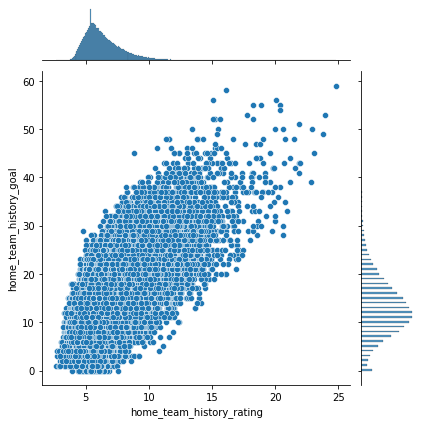

In [24]:
import seaborn as sns
sns.jointplot(data=train_data, x='home_team_history_rating', y='home_team_history_goal')

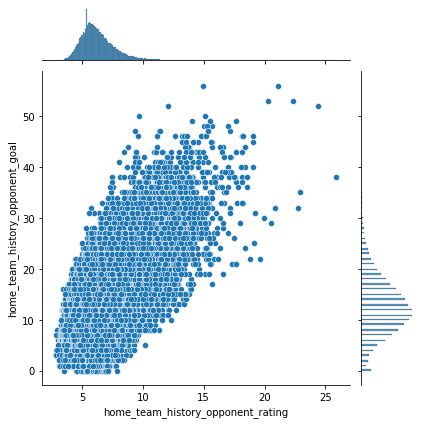

In [25]:
sns.jointplot(data=train_data, x='home_team_history_opponent_rating', y='home_team_history_opponent_goal')

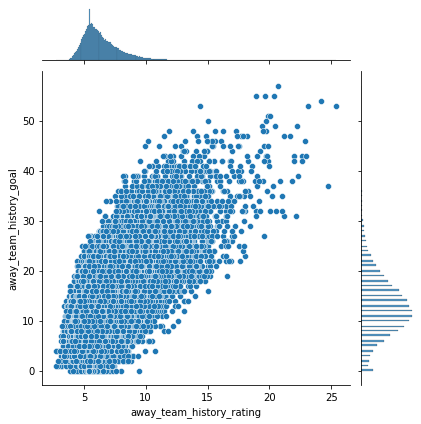

In [26]:
sns.jointplot(data=train_data, x='away_team_history_rating', y='away_team_history_goal')

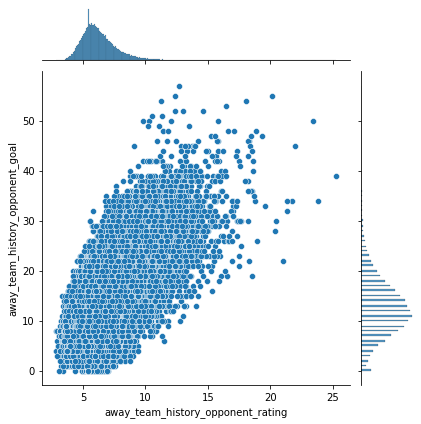

In [27]:
sns.jointplot(data=train_data, x='away_team_history_opponent_rating', y='away_team_history_opponent_goal')

<AxesSubplot:xlabel='home_rating_gap', ylabel='home_goal_diff'>

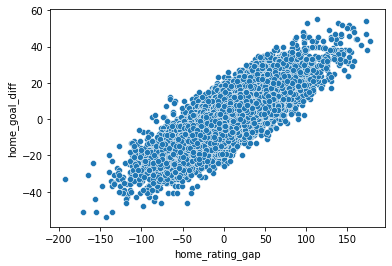

In [28]:
import seaborn as sns
sns.scatterplot(data=train_data, x='home_rating_gap', y='home_goal_diff')

<AxesSubplot:xlabel='away_rating_gap', ylabel='away_goal_diff'>

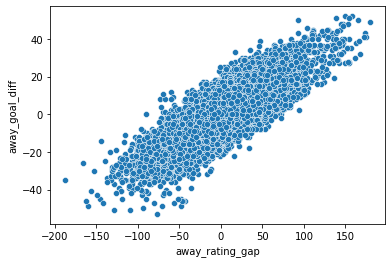

In [29]:
sns.scatterplot(data=train_data, x='away_rating_gap', y='away_goal_diff')

In [30]:
train_data['home_team_history_rating'].describe()

count    110938.000000
mean          6.475705
std           1.703397
min           2.630941
25%           5.353026
50%           6.074088
75%           7.224303
max          24.857236
Name: home_team_history_rating, dtype: float64

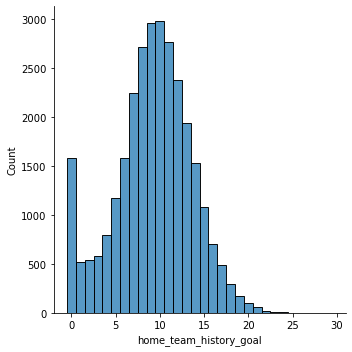

In [31]:
r5=train_data.loc[(train_data.home_team_history_rating > 4.5) & (train_data.home_team_history_rating <5.5)].home_team_history_goal
sns.displot(data=r5, discrete=True)

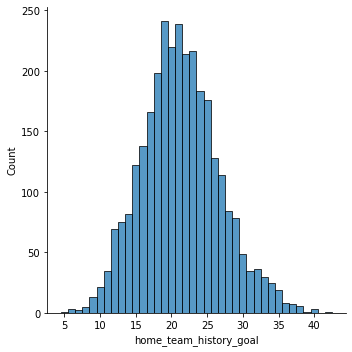

In [32]:
r10=train_data.loc[(train_data.home_team_history_rating > 9.5) & (train_data.home_team_history_rating <10.5)].home_team_history_goal
sns.displot(data=r10, discrete=True)

In [33]:
train_data.shape

(110938, 134)

In [34]:
# Avec la fonction Apply nous allons réuinir les colonnes 'home_team_history_DIFF_goal' et 'away_team_history_DIFF_goal' dans une même colonne score
train_data['score'] = abs(train_data[train_data.columns[122:124]]).apply(
    lambda x: '-'.join(x.astype(int).astype(str)),
    axis=1
)

In [35]:
train_data.head(3)

id target  home_team_history_is_play_home_1  \
0  11906497   away                               0.0   
1  11984383   home                               1.0   
2  11983301   draw                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               1.0                               0.0   
1                               1.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         0.0   
1                                0.0                         0.0   
2                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       3.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       2.0                       0.0   
1                       0.0                       4.0   
2                       2.0                       2.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       0.0                       3.0   
1                       0.0                       0.0   
2                       1.0                       0.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       1.0   
1                       2.0                       0.0   
2                       2.0                       4.0   

   home_team_history_goal_8  home_team_history_goal_9  \
0                       2.0                       1.0   
1                       2.0                       1.0   
2                       3.0                       1.0   

   home_team_history_goal_10  home_team_history_opponent_goal_1  \
0                        4.0                                1.0   
1                        0.0                                2.0   
2

In [36]:
train_data = train_data[['id', 'score', 'target', 'home_goal_diff', 'away_goal_diff', 'home_rating_gap', 'away_rating_gap', 'home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'away_team_history_rating', 'away_team_history_opponent_rating', 'home_team_history_rating', 'home_team_history_opponent_rating']]
train_data.head()

id score target  home_goal_diff  away_goal_diff  home_rating_gap  \
0  11906497   3-7   away             3.0             7.0        10.961665   
1  11984383   1-6   home            -1.0            -6.0        38.940666   
2  11983301  2-10   draw             2.0            10.0        12.972351   
3  11983471   5-4   away             5.0             4.0        24.669076   
4  11883005   4-8   home             4.0             8.0        18.866596   

   away_rating_gap  home_team_history_goal  home_team_history_opponent_goal  \
0        47.523123                    13.0                             10.0   
1       -15.350599                     9.0                             10.0   
2        24.318390                    19.0                             17.0   
3        -6.511223                    18.0                             13.0   
4        -0.446408                    18.0                             14.0   

   away_team_history_goal  away_team_history_opponent_goal  \
0                    16.0                              9.0   
1                     8.0                             14.0   
2                    21.0                             11.0   
3                    24.0                             20.0   
4                    18.0                             10.0   

   away_team_history_rating  away_team_history_opponent_rating  \
0                  8.561214                           3.808902   
1                  5.287316                           6.822376   
2                  7.620071                           5.188232   
3                  5.818128                           6.469250   
4                  5.983338                           6.027979   

   home_team_history_rating  home_team_history_opponent_rating  
0                  5.496371                           4.400204  
1                  8.440839                           4.546772  
2                  6.844712                           5.547477  
3                  7.449923                           4.983015  
4                  7.079634                           5.192975

In [37]:
train_data.shape

(110938, 15)

# Etude des colonnes quantitatif avec target

<AxesSubplot:xlabel='target', ylabel='home_goal_diff'>

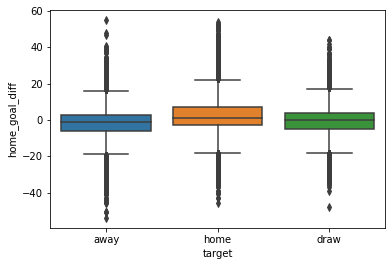

In [38]:
import seaborn as sns
sns.boxplot(x="target",y="home_goal_diff",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_goal_diff'>

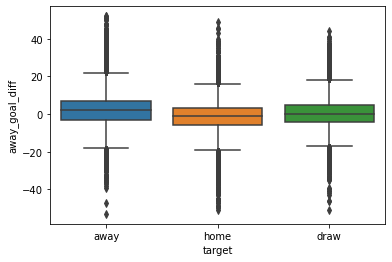

In [39]:
sns.boxplot(x="target",y="away_goal_diff",data=train_data)

<AxesSubplot:xlabel='target', ylabel='home_rating_gap'>

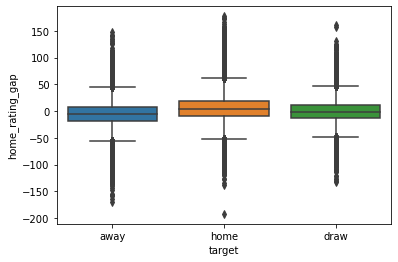

In [40]:
sns.boxplot(x="target",y="home_rating_gap",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_rating_gap'>

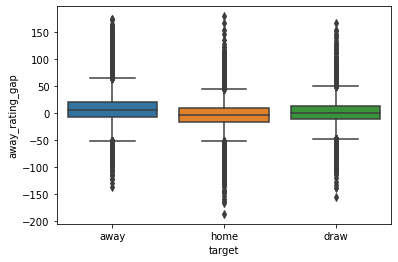

In [41]:
sns.boxplot(x="target",y="away_rating_gap",data=train_data)

<AxesSubplot:xlabel='target', ylabel='home_team_history_goal'>

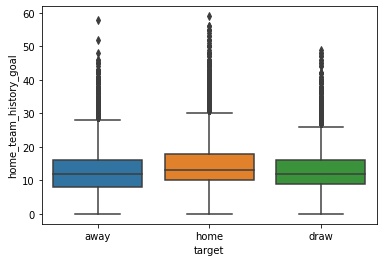

In [42]:
sns.boxplot(x="target",y="home_team_history_goal",data=train_data)

<AxesSubplot:xlabel='target', ylabel='home_team_history_opponent_goal'>

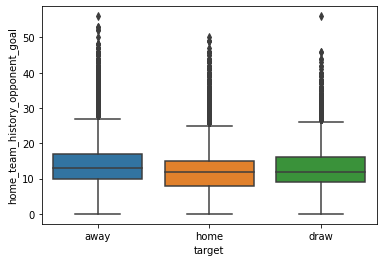

In [43]:
sns.boxplot(x="target",y="home_team_history_opponent_goal",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_team_history_goal'>

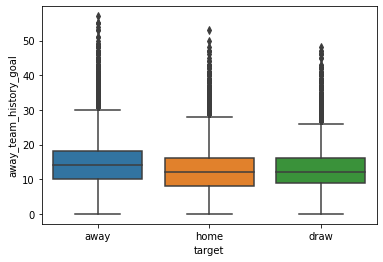

In [44]:
sns.boxplot(x="target",y="away_team_history_goal",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_team_history_opponent_goal'>

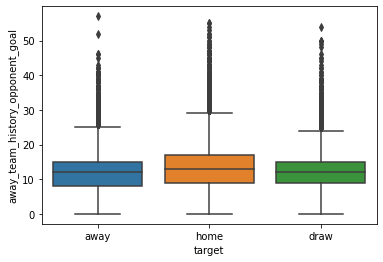

In [45]:
sns.boxplot(x="target",y="away_team_history_opponent_goal",data=train_data)

<AxesSubplot:xlabel='target', ylabel='home_team_history_rating'>

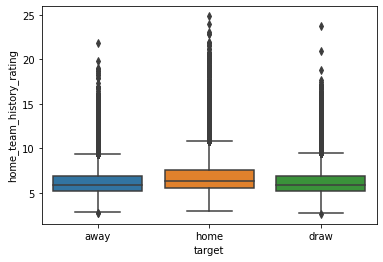

In [46]:
sns.boxplot(x="target",y="home_team_history_rating",data=train_data)

<AxesSubplot:xlabel='target', ylabel='home_team_history_opponent_rating'>

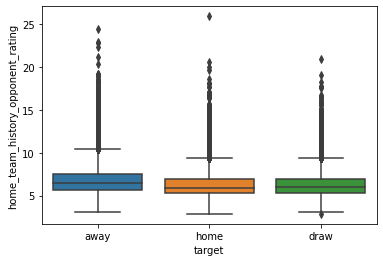

In [47]:
sns.boxplot(x="target",y="home_team_history_opponent_rating",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_team_history_rating'>

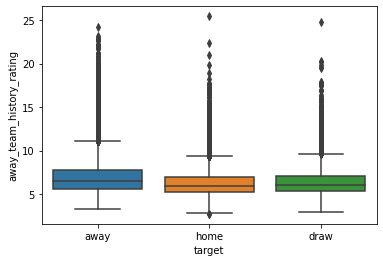

In [48]:
sns.boxplot(x="target",y="away_team_history_rating",data=train_data)

<AxesSubplot:xlabel='target', ylabel='away_team_history_opponent_rating'>

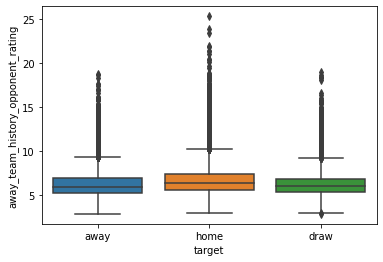

In [49]:
sns.boxplot(x="target",y="away_team_history_opponent_rating",data=train_data)

In [50]:
train_data['target'].value_counts()

home    48113
away    35174
draw    27651
Name: target, dtype: int64

In [51]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_data[["target"]] = enc.fit_transform(train_data[["target"]])

In [52]:
train_data['target'].value_counts()

2.0    48113
0.0    35174
1.0    27651
Name: target, dtype: int64

In [53]:
train_data_numeric = train_data[['home_goal_diff', 'away_goal_diff', 'home_rating_gap', 'away_rating_gap', 'home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'away_team_history_rating', 'away_team_history_opponent_rating', 'home_team_history_rating', 'home_team_history_opponent_rating']]
train_data_normalize = (train_data_numeric-train_data_numeric.min())/(train_data_numeric.max()-train_data_numeric.min())
train_data_normalize.head()

home_goal_diff  away_goal_diff  home_rating_gap  away_rating_gap  \
0        0.522936        0.571429         0.550196         0.640448   
1        0.486239        0.447619         0.625942         0.468966   
2        0.513761        0.600000         0.555640         0.577159   
3        0.541284        0.542857         0.587306         0.493074   
4        0.532110        0.580952         0.571597         0.509616   

   home_team_history_goal  home_team_history_opponent_goal  \
0                0.220339                         0.178571   
1                0.152542                         0.178571   
2                0.322034                         0.303571   
3                0.305085                         0.232143   
4                0.305085                         0.250000   

   away_team_history_goal  away_team_history_opponent_goal  \
0                0.280702                         0.157895   
1                0.140351                         0.245614   
2                0.368421                         0.192982   
3                0.421053                         0.350877   
4                0.315789                         0.175439   

   away_team_history_rating  away_team_history_opponent_rating  \
0                  0.256888                           0.043949   
1                  0.112656                           0.177916   
2                  0.215426                           0.105269   
3                  0.136041                           0.162218   
4                  0.143319                           0.142601   

   home_team_history_rating  home_team_history_opponent_rating  
0                  0.128921                           0.066824  
1                  0.261397                           0.073183  
2                  0.189585                           0.116598  
3                  0.216814                           0.092109  
4                  0.200155                           0.101218

In [54]:
train_data_normalize['target'] = train_data['target']

In [55]:
correlation_train_data_normalize = train_data_normalize.corr()
correlation_train_data_normalize

home_goal_diff  away_goal_diff  \
home_goal_diff                           1.000000        0.051660   
away_goal_diff                           0.051660        1.000000   
home_rating_gap                          0.764558        0.071972   
away_rating_gap                          0.075134        0.763145   
home_team_history_goal                   0.696108        0.048616   
home_team_history_opponent_goal         -0.662321       -0.021010   
away_team_history_goal                   0.050329        0.689447   
away_team_history_opponent_goal         -0.018800       -0.659467   
away_team_history_rating                 0.064134        0.581770   
away_team_history_opponent_rating       -0.047322       -0.555154   
home_team_history_rating                 0.586162        0.058854   
home_team_history_opponent_rating       -0.554113       -0.048181   
target                                   0.187117       -0.187106   

                                   home_rating_gap  away_rating_gap  \
home_goal_diff                            0.764558         0.075134   
away_goal_diff                            0.071972         0.763145   
home_rating_gap                           1.000000         0.089020   
away_rating_gap                           0.089020         1.000000   
home_team_history_goal                    0.551854         0.063761   
home_team_history_opponent_goal          -0.485888        -0.037804   
away_team_history_goal                    0.067588         0.544874   
away_team_history_opponent_goal          -0.028816        -0.483835   
away_team_history_rating                  0.075337         0.764907   
away_team_history_opponent_rating        -0.056762        -0.724699   
home_team_history_rating                  0.769347         0.070089   
home_team_history_opponent_rating        -0.721846        -0.062524   
target                                    0.198471        -0.198563   

                                   home_team_history_goal  \
home_goal_diff                                   0.696108   
away_goal_diff                                   0.048616   
home_rating_gap                                  0.551854   
away_rating_gap                                  0.063761   
home_team_history_goal                           1.000000   
home_team_history_opponent_goal                  0.076846   
away_team_history_goal                           0.252851   
away_team_history_opponent_goal                  0.195569   
away_team_history_rating                         0.234342   
away_team_history_opponent_rating                0.152306   
home_team_history_rating                         0.671569   
home_team_history_opponent_rating               -0.130775   
target                                           0.134096   

                                   home_team_history_opponent_goal  \
home_goal_diff                                           -0.662321   
away_goal_diff                                           -0.021010   
home_rating_gap                                          -0.485888   
away_rating_gap                                          -0.037804   
home_team_history_goal                                    0.076846   
home_team_history_opponent_goal                           1.000000   
away_team_history_goal                                    0.193974   
away_team_history_opponent_goal                           0.230199   
away_team_history_rating                                  0.155487   
away_team_history_opponent_rating                         0.224661   
home_team_history_rating                                 -0.113207   
home_team_history_opponent_rating                         0.633057   
target                                                   -0.119922   

                                   away_team_history_goal  \
home_goal_diff                                   0.050329   
away_goal_diff                                   0.689447   
home_rating_gap                                  0.067

<AxesSubplot:>

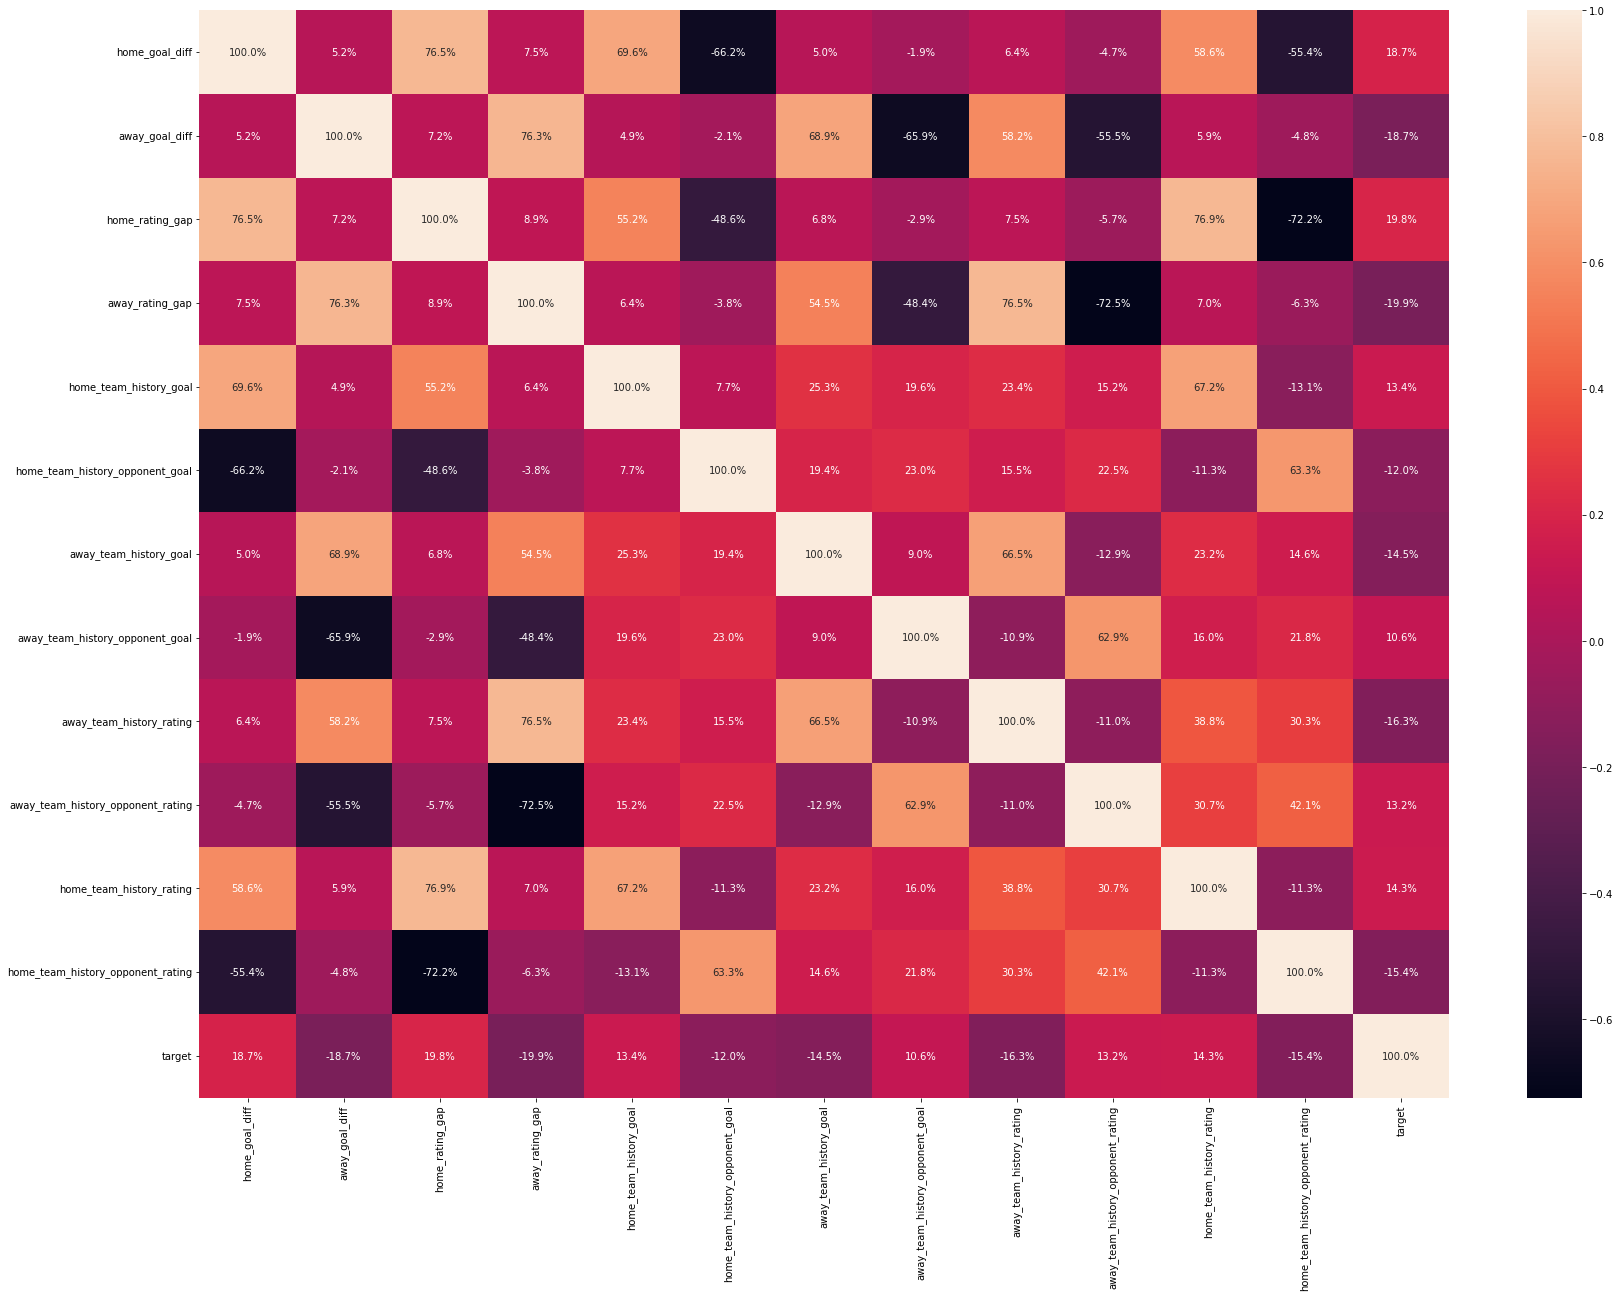

In [56]:
coef_corr = train_data_normalize.corr()

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(28,20))
sns.heatmap(
    coef_corr,
    fmt=".1%", # Permet d'afficher des pourcentages
    annot=True
)

In [57]:
data_test.head()

id home_team_name away_team_name           match_date  league_name  \
0  17761448      team home      team away  2021-05-01 00:15:00   Division 1   
1  17695487      team home      team away  2021-05-01 00:30:00      Liga MX   
2  17715496      team home      team away  2021-05-01 01:00:00  Paulista A2   
3  17715493      team home      team away  2021-05-01 01:00:00  Paulista A2   
4  17715492      team home      team away  2021-05-01 01:00:00  Paulista A2   

   league_id  is_cup  home_team_coach_id  away_team_coach_id  \
0        755   False           9605704.0          30866250.0   
1        743   False          10319425.0            460370.0   
2       1314   False            440905.0            220998.0   
3       1314   False          21036670.0           1553238.0   
4       1314   False           3618158.0          37400444.0   

  home_team_history_match_date_1 home_team_history_match_date_2  \
0            2021-04-28 00:30:00            2021-04-23 23:00:00   
1            2021-04-24 02:06:00            2021-04-17 00:30:00   
2            2021-04-28 23:00:00            2021-04-24 23:00:00   
3            2021-04-29 01:00:00            2021-04-24 23:00:00   
4            2021-04-29 01:00:00            2021-04-24 23:00:00   

  home_team_history_match_date_3 home_team_history_match_date_4  \
0            2021-04-21 00:30:00            2021-04-17 00:15:00   
1            2021-04-10 00:30:00            2021-04-04 01:00:00   
2            2021-04-22 23:00:00            2021-04-21 01:00:00   
3            2021-04-23 01:00:00            2021-04-21 01:00:00   
4            2021-04-22 23:00:00            2021-04-20 23:00:00   

  home_team_history_match_date_5 home_team_history_match_date_6  \
0            2021-04-11 00:30:00            2021-04-06 22:15:00   
1            2021-03-20 01:00:00            2021-03-16 03:00:00   
2            2021-03-14 18:00:00            2021-03-10 18:00:00   
3            2021-03-13 19:00:00            2021-03-10 19:00:00   
4            2021-03-13 18:00:00            2021-03-10 22:00:00   

  home_team_history_match_date_7 home_team_history_match_date_8  \
0            2021-04-01 22:15:00            2021-03-20 22:00:00   
1            2021-03-08 01:06:00            2021-03-05 01:00:00   
2            2021-03-07 13:00:00            2021-02-28 13:00:00   
3            2021-03-06 18:00:00            2021-03-02 19:00:00   
4            2021-03-06 18:00:00            2021-03-02 19:00:00   

  home_team_history_match_date_9 home_team_history_match_date_10  \
0            2021-03-16 22:15:00             2021-03-13 21:30:00   
1            2021-02-27 01:30:00             2021-02-20 01:30:00   
2            2020-08-30 14:00:00             2020-08-26 18:00:00   
3            2020-08-30 14:00:00             2020-08-25 18:00:00   
4            2020-09-16 00:30:00             2020-09-08 18:00:00   

   home_team_history_is_play_home_1  home_team_history_is_play_home_2  \
0                               0.0                               0.0   
1                               0.0                               1.0   
2                               1.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   home_team_history_is_play_home_3  home_team_history_is_play_home_4  \
0                               1.0                               1.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               0.0   
4                               1.0                               0.0   

   home_team_history_is_play_home_5  home_team_history_is_play_home_6  \
0                               0.0                               0.0   
1                               1.0                               0.0   
2                              

In [58]:
data_test.shape

(72711, 189)

In [59]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72711 entries, 0 to 72710
Columns: 189 entries, id to away_team_history_league_id_10
dtypes: bool(1), float64(162), int64(2), object(24)
memory usage: 104.4+ MB


In [60]:
data_test.isnull().sum()*100/len(data_test)

id                                       0.000000
home_team_name                           0.000000
away_team_name                           0.000000
match_date                               0.000000
league_name                              0.000000
league_id                                0.000000
is_cup                                   0.000000
home_team_coach_id                      25.547716
away_team_coach_id                      25.458321
home_team_history_match_date_1           0.684903
home_team_history_match_date_2           1.488083
home_team_history_match_date_3           2.307766
home_team_history_match_date_4           3.112321
home_team_history_match_date_5           3.922378
home_team_history_match_date_6           4.726933
home_team_history_match_date_7           5.618132
home_team_history_match_date_8           6.554717
home_team_history_match_date_9           7.429412
home_team_history_match_date_10          8.339866
home_team_history_is_play_home_1         0.684903


# Nettoyage et préparation des données test

In [61]:
data_test['away_team_history_league_id_10'].mode()

0    1101.0
dtype: float64

In [62]:
data_test['home_team_coach_id']= data_test['home_team_coach_id'].replace(np.nan, 526194.0)
data_test['away_team_coach_id']= data_test['away_team_coach_id'].replace(np.nan, 1553319.0)
data_test['home_team_history_match_date_1']= data_test['home_team_history_match_date_1'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_2']= data_test['home_team_history_match_date_2'].replace(np.nan, "2021-09-25 14:00:00")
data_test['home_team_history_match_date_3']= data_test['home_team_history_match_date_3'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_4']= data_test['home_team_history_match_date_4'].replace(np.nan, "2021-09-25 14:00:00")
data_test['home_team_history_match_date_5']= data_test['home_team_history_match_date_5'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_6']= data_test['home_team_history_match_date_6'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_7']= data_test['home_team_history_match_date_7'].replace(np.nan, "2021-09-25 14:00:00")
data_test['home_team_history_match_date_8']= data_test['home_team_history_match_date_8'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_9']= data_test['home_team_history_match_date_9'].replace(np.nan, "2021-09-11 14:00:00")
data_test['home_team_history_match_date_10']= data_test['home_team_history_match_date_10'].replace(np.nan, "2021-08-21 14:00:00")
data_test['home_team_history_is_play_home_1']= data_test['home_team_history_is_play_home_1'].replace(np.nan, 0.0)
data_test['home_team_history_is_play_home_2']= data_test['home_team_history_is_play_home_2'].replace(np.nan, 1.0)
data_test['home_team_history_is_play_home_3']= data_test['home_team_history_is_play_home_3'].replace(np.nan, 0.0)
data_test['home_team_history_is_play_home_4']= data_test['home_team_history_is_play_home_4'].replace(np.nan, 1.0)
data_test['home_team_history_is_play_home_5']= data_test['home_team_history_is_play_home_5'].replace(np.nan, 0.0)
data_test['home_team_history_is_play_home_6']= data_test['home_team_history_is_play_home_6'].replace(np.nan, 1.0)
data_test['home_team_history_is_play_home_7']= data_test['home_team_history_is_play_home_7'].replace(np.nan, 0.0)
data_test['home_team_history_is_play_home_8']= data_test['home_team_history_is_play_home_8'].replace(np.nan, 1.0)
data_test['home_team_history_is_play_home_9']= data_test['home_team_history_is_play_home_9'].replace(np.nan, 0.0)
data_test['home_team_history_is_play_home_10']= data_test['home_team_history_is_play_home_10'].replace(np.nan, 1.0)
data_test['home_team_history_is_cup_1']= data_test['home_team_history_is_cup_1'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_2']= data_test['home_team_history_is_cup_2'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_3']= data_test['home_team_history_is_cup_3'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_4']= data_test['home_team_history_is_cup_4'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_5']= data_test['home_team_history_is_cup_5'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_6']= data_test['home_team_history_is_cup_6'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_7']= data_test['home_team_history_is_cup_7'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_8']= data_test['home_team_history_is_cup_8'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_9']= data_test['home_team_history_is_cup_9'].replace(np.nan, 0.0)
data_test['home_team_history_is_cup_10']= data_test['home_team_history_is_cup_10'].replace(np.nan, 0.0)
data_test['home_team_history_goal_1']= data_test['home_team_history_goal_1'].replace(np.nan, 0.0)
data_test['home_team_history_goal_2']= data_test['home_team_history_goal_2'].replace(np.nan, 0.0)
data_test['home_team_history_goal_3']= data_test['home_team_history_goal_3'].replace(np.nan, 0.0)
data_test['home_team_history_goal_4']= data_test['home_team_history_goal_4'].replace(np.nan, 0.0)
data_test['home_team_history_goal_5']= data_test['home_team_history_goal_5'].replace(np.nan, 0.0)
data_test['home_team_history_goal_6']= data_test['home_team_history_goal_6'].replace(np.nan, 0.0)
data_test['home_team_history_goal_7']= data_test['home_team_history_goal_7'].replace(np.nan, 0.0)
data_test['home_team_history_goal_8']= data_test['home_team_history_goal_8'].replace(np.nan, 0.0)
data_test['home_team_history_goal_9']= data_test['home_team_history_goal_9'].replace(np.nan, 0.0)
data_test['home_team_history_goal_10']= data_test['home_team_history_goal_10'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_1']= data_test['home_team_history_opponent_goal_1'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_2']= data_test['home_team_history_opponent_goal_2'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_3']= data_test['home_team_history_opponent_goal_3'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_4']= data_test['home_team_history_opponent_goal_4'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_5']= data_test['home_team_history_opponent_goal_5'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_6']= data_test['home_team_history_opponent_goal_6'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_7']= data_test['home_team_history_opponent_goal_7'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_8']= data_test['home_team_history_opponent_goal_8'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_9']= data_test['home_team_history_opponent_goal_9'].replace(np.nan, 0.0)
data_test['home_team_history_opponent_goal_10']= data_test['home_team_history_opponent_goal_10'].replace(np.nan, 0.0)
data_test['home_team_history_rating_1']= data_test['home_team_history_rating_1'].replace(np.nan, 5.8447)
data_test['home_team_history_rating_2']= data_test['home_team_history_rating_2'].replace(np.nan, 5.8447)
data_test['home_team_history_rating_3']= data_test['home_team_history_rating_3'].replace(np.nan, 5.0)
data_test['home_team_history_rating_4']= data_test['home_team_history_rating_4'].replace(np.nan, 5.0)
data_test['home_team_history_rating_5']= data_test['home_team_history_rating_5'].replace(np.nan, 5.0)
data_test['home_team_history_rating_6']= data_test['home_team_history_rating_6'].replace(np.nan, 5.0)
data_test['home_team_history_rating_7']= data_test['home_team_history_rating_7'].replace(np.nan, 5.0)
data_test['home_team_history_rating_8']= data_test['home_team_history_rating_8'].replace(np.nan, 5.0)
data_test['home_team_history_rating_9']= data_test['home_team_history_rating_9'].replace(np.nan, 5.0)
data_test['home_team_history_rating_10']= data_test['home_team_history_rating_10'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_1']= data_test['home_team_history_opponent_rating_1'].replace(np.nan, 5.8447)
data_test['home_team_history_opponent_rating_2']= data_test['home_team_history_opponent_rating_2'].replace(np.nan, 5.8447)
data_test['home_team_history_opponent_rating_3']= data_test['home_team_history_opponent_rating_3'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_4']= data_test['home_team_history_opponent_rating_4'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_5']= data_test['home_team_history_opponent_rating_5'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_6']= data_test['home_team_history_opponent_rating_6'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_7']= data_test['home_team_history_opponent_rating_7'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_8']= data_test['home_team_history_opponent_rating_8'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_9']= data_test['home_team_history_opponent_rating_9'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_10']= data_test['home_team_history_opponent_rating_10'].replace(np.nan, 5.0)
data_test['home_team_history_opponent_rating_10']= data_test['home_team_history_opponent_rating_10'].replace(np.nan, 5.0)
data_test['home_team_history_coach_1']= data_test['home_team_history_coach_1'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_2']= data_test['home_team_history_coach_2'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_3']= data_test['home_team_history_coach_3'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_4']= data_test['home_team_history_coach_4'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_5']= data_test['home_team_history_coach_5'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_6']= data_test['home_team_history_coach_6'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_7']= data_test['home_team_history_coach_7'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_8']= data_test['home_team_history_coach_8'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_9']= data_test['home_team_history_coach_9'].replace(np.nan, 37252510.0)
data_test['home_team_history_coach_10']= data_test['home_team_history_coach_10'].replace(np.nan, 37252510.0)
data_test['home_team_history_league_id_1']= data_test['home_team_history_league_id_1'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_2']= data_test['home_team_history_league_id_2'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_3']= data_test['home_team_history_league_id_3'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_4']= data_test['home_team_history_league_id_4'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_5']= data_test['home_team_history_league_id_5'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_6']= data_test['home_team_history_league_id_6'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_7']= data_test['home_team_history_league_id_7'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_8']= data_test['home_team_history_league_id_8'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_9']= data_test['home_team_history_league_id_9'].replace(np.nan, 1101.0)
data_test['home_team_history_league_id_10']= data_test['home_team_history_league_id_10'].replace(np.nan, 1101.0)
data_test['away_team_history_match_date_1']= data_test['away_team_history_match_date_1'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_2']= data_test['away_team_history_match_date_2'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_3']= data_test['away_team_history_match_date_3'].replace(np.nan, '2021-09-25 14:00:00')
data_test['away_team_history_match_date_4']= data_test['away_team_history_match_date_4'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_5']= data_test['away_team_history_match_date_5'].replace(np.nan, '2021-09-25 14:00:00')
data_test['away_team_history_match_date_6']= data_test['away_team_history_match_date_6'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_7']= data_test['away_team_history_match_date_7'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_8']= data_test['away_team_history_match_date_8'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_match_date_9']= data_test['away_team_history_match_date_9'].replace(np.nan, '2021-08-21 14:00:00')
data_test['away_team_history_match_date_10']= data_test['away_team_history_match_date_10'].replace(np.nan, '2021-09-11 14:00:00')
data_test['away_team_history_is_play_home_1']= data_test['away_team_history_is_play_home_1'].replace(np.nan, 1.0)
data_test['away_team_history_is_play_home_2']= data_test['away_team_history_is_play_home_2'].replace(np.nan, 0.0)
data_test['away_team_history_is_play_home_3']= data_test['away_team_history_is_play_home_3'].replace(np.nan, 1.0)
data_test['away_team_history_is_play_home_4']= data_test['away_team_history_is_play_home_4'].replace(np.nan, 0.0)
data_test['away_team_history_is_play_home_5']= data_test['away_team_history_is_play_home_5'].replace(np.nan, 1.0)
data_test['away_team_history_is_play_home_6']= data_test['away_team_history_is_play_home_6'].replace(np.nan, 0.0)
data_test['away_team_history_is_play_home_7']= data_test['away_team_history_is_play_home_7'].replace(np.nan, 1.0)
data_test['away_team_history_is_play_home_8']= data_test['away_team_history_is_play_home_8'].replace(np.nan, 0.0)
data_test['away_team_history_is_play_home_9']= data_test['away_team_history_is_play_home_9'].replace(np.nan, 1.0)
data_test['away_team_history_is_play_home_10']= data_test['away_team_history_is_play_home_10'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_1']= data_test['away_team_history_is_cup_1'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_2']= data_test['away_team_history_is_cup_2'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_3']= data_test['away_team_history_is_cup_3'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_4']= data_test['away_team_history_is_cup_4'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_5']= data_test['away_team_history_is_cup_5'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_6']= data_test['away_team_history_is_cup_6'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_7']= data_test['away_team_history_is_cup_7'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_8']= data_test['away_team_history_is_cup_8'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_9']= data_test['away_team_history_is_cup_9'].replace(np.nan, 0.0)
data_test['away_team_history_is_cup_10']= data_test['away_team_history_is_cup_10'].replace(np.nan, 0.0)
data_test['away_team_history_goal_1']= data_test['away_team_history_goal_1'].replace(np.nan, 0.0)
data_test['away_team_history_goal_2']= data_test['away_team_history_goal_2'].replace(np.nan, 0.0)
data_test['away_team_history_goal_3']= data_test['away_team_history_goal_3'].replace(np.nan, 0.0)
data_test['away_team_history_goal_4']= data_test['away_team_history_goal_4'].replace(np.nan, 0.0)
data_test['away_team_history_goal_5']= data_test['away_team_history_goal_5'].replace(np.nan, 0.0)
data_test['away_team_history_goal_6']= data_test['away_team_history_goal_6'].replace(np.nan, 0.0)
data_test['away_team_history_goal_7']= data_test['away_team_history_goal_7'].replace(np.nan, 0.0)
data_test['away_team_history_goal_8']= data_test['away_team_history_goal_8'].replace(np.nan, 0.0)
data_test['away_team_history_goal_9']= data_test['away_team_history_goal_9'].replace(np.nan, 0.0)
data_test['away_team_history_goal_10']= data_test['away_team_history_goal_10'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_1']= data_test['away_team_history_opponent_goal_1'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_2']= data_test['away_team_history_opponent_goal_2'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_3']= data_test['away_team_history_opponent_goal_3'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_4']= data_test['away_team_history_opponent_goal_4'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_5']= data_test['away_team_history_opponent_goal_5'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_6']= data_test['away_team_history_opponent_goal_6'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_7']= data_test['away_team_history_opponent_goal_7'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_8']= data_test['away_team_history_opponent_goal_8'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_9']= data_test['away_team_history_opponent_goal_9'].replace(np.nan, 0.0)
data_test['away_team_history_opponent_goal_10']= data_test['away_team_history_opponent_goal_10'].replace(np.nan, 0.0)
data_test['away_team_history_rating_1']= data_test['away_team_history_rating_1'].replace(np.nan, 5.8447)
data_test['away_team_history_rating_2']= data_test['away_team_history_rating_2'].replace(np.nan, 5.8447)
data_test['away_team_history_rating_3']= data_test['away_team_history_rating_3'].replace(np.nan, 5.0)
data_test['away_team_history_rating_4']= data_test['away_team_history_rating_4'].replace(np.nan, 5.0)
data_test['away_team_history_rating_5']= data_test['away_team_history_rating_5'].replace(np.nan, 5.0)
data_test['away_team_history_rating_6']= data_test['away_team_history_rating_6'].replace(np.nan, 5.0)
data_test['away_team_history_rating_7']= data_test['away_team_history_rating_7'].replace(np.nan, 5.0)
data_test['away_team_history_rating_8']= data_test['away_team_history_rating_8'].replace(np.nan, 5.0)
data_test['away_team_history_rating_9']= data_test['away_team_history_rating_9'].replace(np.nan, 5.0)
data_test['away_team_history_rating_10']= data_test['away_team_history_rating_10'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_1']= data_test['away_team_history_opponent_rating_1'].replace(np.nan, 5.8447)
data_test['away_team_history_opponent_rating_2']= data_test['away_team_history_opponent_rating_2'].replace(np.nan, 5.8447)
data_test['away_team_history_opponent_rating_3']= data_test['away_team_history_opponent_rating_3'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_4']= data_test['away_team_history_opponent_rating_4'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_5']= data_test['away_team_history_opponent_rating_5'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_6']= data_test['away_team_history_opponent_rating_6'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_7']= data_test['away_team_history_opponent_rating_7'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_8']= data_test['away_team_history_opponent_rating_8'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_9']= data_test['away_team_history_opponent_rating_9'].replace(np.nan, 5.0)
data_test['away_team_history_opponent_rating_10']= data_test['away_team_history_opponent_rating_10'].replace(np.nan, 5.0)
data_test['away_team_history_coach_1']= data_test['away_team_history_coach_1'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_2']= data_test['away_team_history_coach_2'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_3']= data_test['away_team_history_coach_3'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_4']= data_test['away_team_history_coach_4'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_5']= data_test['away_team_history_coach_5'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_6']= data_test['away_team_history_coach_6'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_7']= data_test['away_team_history_coach_7'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_8']= data_test['away_team_history_coach_8'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_9']= data_test['away_team_history_coach_9'].replace(np.nan, 37252510.0)
data_test['away_team_history_coach_10']= data_test['away_team_history_coach_10'].replace(np.nan, 37252510.0)
data_test['away_team_history_league_id_1']= data_test['away_team_history_league_id_1'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_2']= data_test['away_team_history_league_id_2'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_3']= data_test['away_team_history_league_id_3'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_4']= data_test['away_team_history_league_id_4'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_5']= data_test['away_team_history_league_id_5'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_6']= data_test['away_team_history_league_id_6'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_7']= data_test['away_team_history_league_id_7'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_8']= data_test['away_team_history_league_id_8'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_9']= data_test['away_team_history_league_id_9'].replace(np.nan, 1101.0)
data_test['away_team_history_league_id_10']= data_test['away_team_history_league_id_10'].replace(np.nan, 1101.0)


In [63]:
data_test.isnull().sum()*100/len(data_test)

id                                      0.0
home_team_name                          0.0
away_team_name                          0.0
match_date                              0.0
league_name                             0.0
league_id                               0.0
is_cup                                  0.0
home_team_coach_id                      0.0
away_team_coach_id                      0.0
home_team_history_match_date_1          0.0
home_team_history_match_date_2          0.0
home_team_history_match_date_3          0.0
home_team_history_match_date_4          0.0
home_team_history_match_date_5          0.0
home_team_history_match_date_6          0.0
home_team_history_match_date_7          0.0
home_team_history_match_date_8          0.0
home_team_history_match_date_9          0.0
home_team_history_match_date_10         0.0
home_team_history_is_play_home_1        0.0
home_team_history_is_play_home_2        0.0
home_team_history_is_play_home_3        0.0
home_team_history_is_play_home_4

In [64]:
# Converture les colonnes "date" en datatime 
for col in data_test.filter(regex='date', axis=1).columns:
    data_test[col] = pd.to_datetime(data_test[col])

In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72711 entries, 0 to 72710
Columns: 189 entries, id to away_team_history_league_id_10
dtypes: bool(1), datetime64[ns](21), float64(162), int64(2), object(3)
memory usage: 104.4+ MB


In [66]:
# Supprimons les colonnes :home_team_name, away_team_name, is_cup, league_name
data_test = data_test.drop(['home_team_name', 'away_team_name', 'is_cup', 'league_name'], axis = 1)
data_test.head(2)

id          match_date  league_id  home_team_coach_id  \
0  17761448 2021-05-01 00:15:00        755           9605704.0   
1  17695487 2021-05-01 00:30:00        743          10319425.0   

   away_team_coach_id home_team_history_match_date_1  \
0          30866250.0            2021-04-28 00:30:00   
1            460370.0            2021-04-24 02:06:00   

  home_team_history_match_date_2 home_team_history_match_date_3  \
0            2021-04-23 23:00:00            2021-04-21 00:30:00   
1            2021-04-17 00:30:00            2021-04-10 00:30:00   

  home_team_history_match_date_4 home_team_history_match_date_5  \
0            2021-04-17 00:15:00            2021-04-11 00:30:00   
1            2021-04-04 01:00:00            2021-03-20 01:00:00   

  home_team_history_match_date_6 home_team_history_match_date_7  \
0            2021-04-06 22:15:00            2021-04-01 22:15:00   
1            2021-03-16 03:00:00            2021-03-08 01:06:00   

  home_team_history_match_date_8 home_team_history_match_date_9  \
0            2021-03-20 22:00:00            2021-03-16 22:15:00   
1            2021-03-05 01:00:00            2021-02-27 01:30:00   

  home_team_history_match_date_10  home_team_history_is_play_home_1  \
0             2021-03-13 21:30:00                               0.0   
1             2021-02-20 01:30:00                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               0.0                               1.0   
1                               1.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               0.0                               0.0   
1                               0.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               0.0                               1.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         1.0   
1                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         1.0   
1                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         1.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         1.0   
1                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       3.0                       1.0   
1                       0.0                       0.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       1.0                       2.0   
1                       1.0                       1.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       2.0   
1                       1.0                       1.0   

   home_team_history_goal_8  home_team_history_goal_9  \
0                       1.0                 

In [67]:
# Eluminons  par filtration des colonnes contenant : date; league, coach afin de garder que quelques colonnes:
data_test.drop(data_test.filter(regex='date').columns, axis = 1, inplace = True)
data_test.drop(data_test.filter(regex='coach').columns, axis = 1, inplace = True)
data_test.drop(data_test.filter(regex='league').columns, axis = 1, inplace = True)


In [68]:
data_test.head(3)

id  home_team_history_is_play_home_1  \
0  17761448                               0.0   
1  17695487                               0.0   
2  17715496                               1.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               0.0                               1.0   
1                               1.0                               1.0   
2                               0.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               0.0                               0.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               0.0                               1.0   
1                               1.0                               0.0   
2                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         1.0   
1                                1.0                         0.0   
2                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         1.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       1.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       3.0                       1.0   
1                       0.0                       0.0   
2                       0.0                       0.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       1.0                       2.0   
1                       1.0                       1.0   
2                       1.0                       0.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       2.0   
1                       1.0                       1.0   
2                       2.0                       2.0   

   home_team_history_goal_8  home_team_history_goal_9  \
0                       1.0                       0.0   
1                       2.0                       0.0   
2                       0.0                       0.0   

   home_team_history_goal_10  home_team_history_opponent_goal_1  \
0                        0.0                                0.0   
1                        1.0                                1.0   
2                        2.0 

In [69]:
data_test.shape

(72711, 121)

In [70]:
data_test['home_team_history_goal'] = data_test['home_team_history_goal_1'] + data_test['home_team_history_goal_2'] + data_test['home_team_history_goal_3'] + data_test['home_team_history_goal_4'] + data_test['home_team_history_goal_5'] + data_test['home_team_history_goal_6'] + data_test['home_team_history_goal_7'] + data_test['home_team_history_goal_8'] + data_test['home_team_history_goal_9'] + data_test['home_team_history_goal_10']
data_test['home_team_history_opponent_goal'] = data_test['home_team_history_opponent_goal_1'] + data_test['home_team_history_opponent_goal_2'] + data_test['home_team_history_opponent_goal_3'] + data_test['home_team_history_opponent_goal_4'] + data_test['home_team_history_opponent_goal_5'] + data_test['home_team_history_opponent_goal_6'] + data_test['home_team_history_opponent_goal_7'] + data_test['home_team_history_opponent_goal_8'] + data_test['home_team_history_opponent_goal_9'] + data_test['home_team_history_opponent_goal_10']
data_test['away_team_history_goal'] = data_test['away_team_history_goal_1'] + data_test['away_team_history_goal_2'] + data_test['away_team_history_goal_3'] + data_test['away_team_history_goal_4'] + data_test['away_team_history_goal_5'] + data_test['away_team_history_goal_6'] + data_test['away_team_history_goal_7'] + data_test['away_team_history_goal_8'] + data_test['away_team_history_goal_9'] + data_test['away_team_history_goal_10']
data_test['away_team_history_opponent_goal'] = data_test['away_team_history_opponent_goal_1'] + data_test['away_team_history_opponent_goal_2'] + data_test['away_team_history_opponent_goal_3'] + data_test['away_team_history_opponent_goal_4'] + data_test['away_team_history_opponent_goal_5'] + data_test['away_team_history_opponent_goal_6'] + data_test['away_team_history_opponent_goal_7'] + data_test['away_team_history_opponent_goal_8'] + data_test['away_team_history_opponent_goal_9'] + data_test['away_team_history_opponent_goal_10']

data_test['home_goal_diff'] = data_test['home_team_history_goal'] - data_test['home_team_history_opponent_goal']
data_test['away_goal_diff'] = data_test['away_team_history_goal'] - data_test['away_team_history_opponent_goal']
data_test['home_rating_gap'] = (data_test['home_team_history_rating_1'] + data_test['home_team_history_rating_2'] + data_test['home_team_history_rating_3'] + data_test['home_team_history_rating_4'] + data_test['home_team_history_rating_5'] + data_test['home_team_history_rating_6'] + data_test['home_team_history_rating_7'] + data_test['home_team_history_rating_8'] + data_test['home_team_history_rating_9'] + data_test['home_team_history_rating_10']) - (data_test['home_team_history_opponent_rating_1'] + data_test['home_team_history_opponent_rating_2'] + data_test['home_team_history_opponent_rating_3'] + data_test['home_team_history_opponent_rating_4'] + data_test['home_team_history_opponent_rating_5'] + data_test['home_team_history_opponent_rating_6'] + data_test['home_team_history_opponent_rating_7'] + data_test['home_team_history_opponent_rating_8'] + data_test['home_team_history_opponent_rating_9'] + data_test['home_team_history_opponent_rating_10'])
data_test['away_rating_gap'] = (data_test['away_team_history_rating_1'] + data_test['away_team_history_rating_2'] + data_test['away_team_history_rating_3'] + data_test['away_team_history_rating_4'] + data_test['away_team_history_rating_5'] + data_test['away_team_history_rating_6'] + data_test['away_team_history_rating_7'] + data_test['away_team_history_rating_8'] + data_test['away_team_history_rating_9'] + data_test['away_team_history_rating_10']) - (data_test['away_team_history_opponent_rating_1'] + data_test['away_team_history_opponent_rating_2'] + data_test['away_team_history_opponent_rating_3'] + data_test['away_team_history_opponent_rating_4'] + data_test['away_team_history_opponent_rating_5'] + data_test['away_team_history_opponent_rating_6'] + data_test['away_team_history_opponent_rating_7'] + data_test['away_team_history_opponent_rating_8'] + data_test['away_team_history_opponent_rating_9'] + data_test['away_team_history_opponent_rating_10'])


In [71]:
df2_away_history_rating = data_test[['away_team_history_rating_1', 'away_team_history_rating_2', 'away_team_history_rating_3', 'away_team_history_rating_4', 'away_team_history_rating_5', 'away_team_history_rating_6', 'away_team_history_rating_7', 'away_team_history_rating_8', 'away_team_history_rating_9', 'away_team_history_rating_10']]
df2_away_team_history_opponent_rating = data_test[['away_team_history_opponent_rating_1', 'away_team_history_opponent_rating_2', 'away_team_history_opponent_rating_3', 'away_team_history_opponent_rating_4', 'away_team_history_opponent_rating_5', 'away_team_history_opponent_rating_6', 'away_team_history_opponent_rating_7', 'away_team_history_opponent_rating_8', 'away_team_history_opponent_rating_9', 'away_team_history_opponent_rating_10']]
df2_home_team_history_rating = data_test[['home_team_history_rating_1', 'home_team_history_rating_2', 'home_team_history_rating_3', 'home_team_history_rating_4', 'home_team_history_rating_5', 'home_team_history_rating_6', 'home_team_history_rating_7', 'home_team_history_rating_8', 'home_team_history_rating_9', 'home_team_history_rating_10']]
df2_home_team_history_opponent_rating = data_test[['home_team_history_opponent_rating_1', 'home_team_history_opponent_rating_2', 'home_team_history_opponent_rating_3', 'home_team_history_opponent_rating_4', 'home_team_history_opponent_rating_5', 'home_team_history_opponent_rating_6', 'home_team_history_opponent_rating_7', 'home_team_history_opponent_rating_8', 'home_team_history_opponent_rating_9', 'home_team_history_opponent_rating_10']]

In [72]:
away_team_history_rating = df2_away_history_rating.mean(axis='columns')
away_team_history_opponent_rating = df2_away_team_history_opponent_rating.mean(axis='columns')
home_team_history_rating = df2_home_team_history_rating.mean(axis='columns')
home_team_history_opponent_rating = df2_home_team_history_opponent_rating.mean(axis='columns')

In [73]:
data_test = data_test.assign(away_team_history_rating = df2_away_history_rating.mean(axis='columns'),
               away_team_history_opponent_rating = df2_away_team_history_opponent_rating.mean(axis='columns'),
                               home_team_history_rating = df2_home_team_history_rating.mean(axis='columns'),
                               home_team_history_opponent_rating = df2_home_team_history_opponent_rating.mean(axis='columns'))

In [74]:
data_test.head(4)

id  home_team_history_is_play_home_1  \
0  17761448                               0.0   
1  17695487                               0.0   
2  17715496                               1.0   
3  17715493                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               0.0                               1.0   
1                               1.0                               1.0   
2                               0.0                               1.0   
3                               0.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   
2                               0.0                               0.0   
3                               0.0                               1.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               1.0                               0.0   
3                               0.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               0.0                               1.0   
1                               1.0                               0.0   
2                               1.0                               0.0   
3                               1.0                               1.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         1.0   
1                                1.0                         0.0   
2                                1.0                         0.0   
3                                0.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         1.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       1.0   
3                          0.0                       0.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       3.0                       1.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       1.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       1.0                       2.0   
1                       1.0      

In [75]:
data_test.shape

(72711, 133)

In [76]:
# Avec la fonction Apply nous allons réuinir les colonnes 'home_goal_diff' et 'away_goal_diff' dans une même colonne score
data_test['score'] = abs(data_test[data_test.columns[125:127]]).apply(lambda x: '-'.join(x.astype(int).astype(str)),axis=1)

In [77]:
data_test.head(2)

id  home_team_history_is_play_home_1  \
0  17761448                               0.0   
1  17695487                               0.0   

   home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                               0.0                               1.0   
1                               1.0                               1.0   

   home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                               1.0                               0.0   
1                               0.0                               1.0   

   home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                               0.0                               0.0   
1                               0.0                               0.0   

   home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                               0.0                               1.0   
1                               1.0                               0.0   

   home_team_history_is_play_home_10  home_team_history_is_cup_1  \
0                                1.0                         1.0   
1                                1.0                         0.0   

   home_team_history_is_cup_2  home_team_history_is_cup_3  \
0                         0.0                         1.0   
1                         0.0                         0.0   

   home_team_history_is_cup_4  home_team_history_is_cup_5  \
0                         0.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_6  home_team_history_is_cup_7  \
0                         1.0                         0.0   
1                         0.0                         0.0   

   home_team_history_is_cup_8  home_team_history_is_cup_9  \
0                         0.0                         1.0   
1                         0.0                         0.0   

   home_team_history_is_cup_10  home_team_history_goal_1  \
0                          0.0                       0.0   
1                          0.0                       0.0   

   home_team_history_goal_2  home_team_history_goal_3  \
0                       3.0                       1.0   
1                       0.0                       0.0   

   home_team_history_goal_4  home_team_history_goal_5  \
0                       1.0                       2.0   
1                       1.0                       1.0   

   home_team_history_goal_6  home_team_history_goal_7  \
0                       0.0                       2.0   
1                       1.0                       1.0   

   home_team_history_goal_8  home_team_history_goal_9  \
0                       1.0                       0.0   
1                       2.0                       0.0   

   home_team_history_goal_10  home_team_history_opponent_goal_1  \
0                        0.0                                0.0   
1                        1.0                                1.0   

   home_team_history_opponent_goal_2  home_team_history_opponent_goal_3  \
0                                0.0                                0.0   
1                                0.0                                1.0   

   home_team_history_opponent_goal_4  home_team_history_opponent_goal_5  \
0                                1.0                                2.0   
1                                2.0                                0.0   

   home_team_history_opponent_goal_6  home_team_history_opponent_goal_7  \
0                                0.0                                0.0   
1                                3.0                                3.0   

   home_team_history_opponent_goal_8  home_team_history_opponent_goal_9  \
0                                1.0                                0.0   
1                                2.0                                1.0   

   home_team_history_opponent_goal_10  home_team_history_rating_1

In [78]:
data_test = data_test[['id', 'score', 'home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'home_goal_diff', 'away_goal_diff', 'home_team_history_rating', 'home_team_history_opponent_rating', 'away_team_history_rating', 'away_team_history_opponent_rating', 'home_rating_gap', 'away_rating_gap']]

In [79]:
data_test.head()

id score  home_team_history_goal  home_team_history_opponent_goal  \
0  17761448   4-3                    10.0                              6.0   
1  17695487   7-0                     7.0                             14.0   
2  17715496   6-9                     8.0                             14.0   
3  17715493   8-3                     8.0                             16.0   
4  17715492   3-3                     9.0                             12.0   

   away_team_history_goal  away_team_history_opponent_goal  home_goal_diff  \
0                    11.0                             14.0             4.0   
1                    10.0                             10.0            -7.0   
2                     6.0                             15.0            -6.0   
3                    11.0                              8.0            -8.0   
4                     6.0                              9.0            -3.0   

   away_goal_diff  home_team_history_rating  \
0            -3.0                  4.570763   
1             0.0                  5.203757   
2            -9.0                  4.474860   
3             3.0                  4.561036   
4            -3.0                  5.102046   

   home_team_history_opponent_rating  away_team_history_rating  \
0                           7.408696                  4.811870   
1                           6.435353                  5.885441   
2                           6.684485                  4.663345   
3                           6.706340                  6.809434   
4                           5.986625                  4.377685   

   away_team_history_opponent_rating  home_rating_gap  away_rating_gap  
0                           6.221093       -28.379332       -14.092228  
1                           5.629701       -12.315961         2.557406  
2                           6.153065       -22.096249       -14.897201  
3                           4.405098       -21.453036        24.043358  
4                           6.635796        -8.845791       -22.581111

In [80]:
data_test.shape

(72711, 14)

In [81]:
data_test_numeric = data_test[['home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'home_goal_diff', 'away_goal_diff', 'home_team_history_rating', 'home_team_history_opponent_rating', 'away_team_history_rating', 'away_team_history_opponent_rating', 'home_rating_gap', 'away_rating_gap']]
data_test_normalize = (data_test_numeric-data_test_numeric.min())/(data_test_numeric.max()-data_test_numeric.min())
data_test_normalize.head()

home_team_history_goal  home_team_history_opponent_goal  \
0                0.161290                         0.086957   
1                0.112903                         0.202899   
2                0.129032                         0.202899   
3                0.129032                         0.231884   
4                0.145161                         0.173913   

   away_team_history_goal  away_team_history_opponent_goal  home_goal_diff  \
0                0.166667                         0.191781           0.552   
1                0.151515                         0.136986           0.464   
2                0.090909                         0.205479           0.472   
3                0.166667                         0.109589           0.456   
4                0.090909                         0.123288           0.496   

   away_goal_diff  home_team_history_rating  \
0        0.507576                  0.101239   
1        0.530303                  0.135590   
2        0.462121                  0.096034   
3        0.553030                  0.100711   
4        0.507576                  0.130070   

   home_team_history_opponent_rating  away_team_history_rating  \
0                           0.227570                  0.113063   
1                           0.178517                  0.171505   
2                           0.191072                  0.104977   
3                           0.192174                  0.221805   
4                           0.155903                  0.089427   

   away_team_history_opponent_rating  home_rating_gap  away_rating_gap  
0                           0.165805         0.437364         0.481354  
1                           0.136517         0.486301         0.533023  
2                           0.162436         0.456505         0.478855  
3                           0.075870         0.458465         0.599702  
4                           0.186342         0.496873         0.455010

In [82]:
data_test_normalize[['id', 'score']] = data_test[['id', 'score']]

In [83]:
data_test_normalize = data_test_normalize[['id', 'score', 'home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'home_goal_diff', 'away_goal_diff', 'home_team_history_rating', 'home_team_history_opponent_rating', 'away_team_history_rating', 'away_team_history_opponent_rating', 'home_rating_gap', 'away_rating_gap']]

In [84]:
data_test_normalize.head(3)

id score  home_team_history_goal  home_team_history_opponent_goal  \
0  17761448   4-3                0.161290                         0.086957   
1  17695487   7-0                0.112903                         0.202899   
2  17715496   6-9                0.129032                         0.202899   

   away_team_history_goal  away_team_history_opponent_goal  home_goal_diff  \
0                0.166667                         0.191781           0.552   
1                0.151515                         0.136986           0.464   
2                0.090909                         0.205479           0.472   

   away_goal_diff  home_team_history_rating  \
0        0.507576                  0.101239   
1        0.530303                  0.135590   
2        0.462121                  0.096034   

   home_team_history_opponent_rating  away_team_history_rating  \
0                           0.227570                  0.113063   
1                           0.178517                  0.171505   
2                           0.191072                  0.104977   

   away_team_history_opponent_rating  home_rating_gap  away_rating_gap  
0                           0.165805         0.437364         0.481354  
1                           0.136517         0.486301         0.533023  
2                           0.162436         0.456505         0.478855

In [85]:
x_news1 = data_test_normalize[['home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'home_team_history_rating', 'home_team_history_opponent_rating', 'away_team_history_rating', 'away_team_history_opponent_rating']]

In [86]:
x = train_data_normalize[['home_team_history_goal', 'home_team_history_opponent_goal', 'away_team_history_goal', 'away_team_history_opponent_goal', 'home_team_history_rating', 'home_team_history_opponent_rating', 'away_team_history_rating', 'away_team_history_opponent_rating']]
y = train_data_normalize['target']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=5)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [89]:
print(regressor.intercept_)
print(regressor.coef_)

1.1606039958037384
[ 0.71411433 -0.38575083 -0.6702422   0.36723409  1.1418105  -1.27176121
 -1.33449139  1.08189974]


In [90]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

Coefficient
home_team_history_goal                0.714114
home_team_history_opponent_goal      -0.385751
away_team_history_goal               -0.670242
away_team_history_opponent_goal       0.367234
home_team_history_rating              1.141811
home_team_history_opponent_rating    -1.271761
away_team_history_rating             -1.334491
away_team_history_opponent_rating     1.081900

In [91]:
target_pred_train = regressor.predict(x_test).round(0)
target_pred_train

array([1., 1., 1., ..., 1., 1., 1.])

In [92]:
target_pred_test = regressor.predict(x_news1).round(0)
target_pred_test

array([1., 1., 1., ..., 1., 1., 1.])

In [93]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, target_pred_train).round(0))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, target_pred_train).round(0))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, target_pred_train)).round(0))

Mean Absolute Error: 1.0
Mean Squared Error: 1.0
Root Mean Squared Error: 1.0


In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(target_pred_train, y_test)

0.2986713299320341

In [96]:
pred=pd.DataFrame(target_pred_test)
football=pd.read_csv("sample_submission.csv")
dataset=pd.concat([football["id"],pred],axis=1 )
dataset.columns=["id", "target"]
dataset['target'] = dataset['target'].replace(2.0, 'home')
dataset['target'] = dataset['target'].replace(0.0, 'away')
dataset['target'] = dataset['target'].replace(1.0, 'draw')
target_conv = pd.get_dummies(dataset['target'], drop_first = True)
datasub=pd.concat([football["id"],target_conv],axis=1 )
datasub = datasub.drop(3.0, axis = 1)
datasub= datasub[['id','home', 'draw', 'away']]
datasub.to_csv("football_submission.csv",index=False)

In [97]:
datasub.head()

id  home  draw  away
0  17761448     0     1     0
1  17695487     0     1     0
2  17715496     0     1     0
3  17715493     0     1     0
4  17715492     0     1     0

In [98]:
sample.head()

id   home   draw   away
0  17761448  0.333  0.333  0.333
1  17695487  0.333  0.333  0.333
2  17715496  0.333  0.333  0.333
3  17715493  0.333  0.333  0.333
4  17715492  0.333  0.333  0.333

# Construction du model Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 5)
lr.fit(x_train, y_train)

LogisticRegression(random_state=5)

In [100]:
lr_target_train_predict = lr.predict(x_test)
lr_target_train_predict

array([0., 0., 2., ..., 2., 2., 0.])

In [101]:
accuracy_score(lr_target_train_predict, y_test)

0.4896068074059384

In [102]:
lr_target_test_predict = lr.predict(x_news1)
lr_target_test_predict

array([2., 0., 2., ..., 0., 2., 2.])

In [103]:
pred_lr=pd.DataFrame(lr_target_test_predict)
football2=pd.read_csv("sample_submission.csv")
dataset_lr=pd.concat([football2["id"],pred_lr],axis=1 )
dataset_lr.columns=["id", "target"]
dataset_lr['target'] = dataset_lr['target'].replace(2.0, 'home')
dataset_lr['target'] = dataset_lr['target'].replace(0.0, 'away')
dataset_lr['target'] = dataset_lr['target'].replace(1.0, 'draw')
target_conv_lr = pd.get_dummies(dataset_lr['target'], drop_first = False)
datasub_lr=pd.concat([football2["id"],target_conv_lr],axis=1 )

#wn = np.ones((72711, 1))
#new_col = pd.DataFrame(data=wn,columns=['draw'])
#datasub_lr = pd.concat([datasub_lr,new_col], axis=1)
datasub_lr= datasub_lr[['id','home', 'away']]

datasub_lr.to_csv("football_submission_logistic_reg.csv",index=False)

In [104]:
datasub_lr.head()

id  home  away
0  17761448     1     0
1  17695487     0     1
2  17715496     1     0
3  17715493     0     1
4  17715492     1     0

In [105]:
dataset_lr['target'].value_counts()

home    47363
away    25347
draw        1
Name: target, dtype: int64

In [106]:
dataset_lr['target'].value_counts()

home    47363
away    25347
draw        1
Name: target, dtype: int64

# Construction du model KNeighborsClassifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
model_kn=KNeighborsClassifier()
model_kn.fit(x_train, y_train)

KNeighborsClassifier()

In [108]:
model_kn.score(x_train,y_train)

0.6013088391714291

In [109]:
kn_target_train = model_kn.predict(x_test)
kn_target_train

array([0., 0., 2., ..., 2., 1., 0.])

In [110]:
kn_target_test = model_kn.predict(x_news1)
kn_target_test

array([0., 2., 1., ..., 0., 1., 1.])

In [111]:
pred_kn=pd.DataFrame(kn_target_test)
football_kn=pd.read_csv("sample_submission.csv")
dataset_kn=pd.concat([football_kn["id"],pred_kn],axis=1 )
dataset_kn.columns=["id", "target"]
dataset_kn['target'] = dataset_kn['target'].replace(2.0, 'home')
dataset_kn['target'] = dataset_kn['target'].replace(0.0, 'away')
dataset_kn['target'] = dataset_kn['target'].replace(1.0, 'draw')
target_conv_kn = pd.get_dummies(dataset_kn['target'], drop_first = False)
datasub_kn=pd.concat([football_kn["id"],target_conv_kn],axis=1 )
#datasub = datasub.drop(3.0, axis = 1)
datasub_kn= datasub_kn[['id','home', 'draw', 'away']]
datasub_kn.to_csv("football_submission_KN.csv",index=False)

In [112]:
datasub_kn.head()

id  home  draw  away
0  17761448     0     0     1
1  17695487     1     0     0
2  17715496     0     1     0
3  17715493     0     0     1
4  17715492     0     1     0

# Trainset / Testset : train_test_split

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=5)
model_kn5 = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
print("Train score :", model_kn5.score(x_train, y_train))
print("Test score :", model_kn5.score(x_test, y_test))

Train score : 0.6013088391714291
Test score : 0.41401503542519247


# Validation set : Améliorer le modèle

# Validation Set

Cette section permet de chercher les réglages du modèle qui donnent les meilleurs performances tout en gardant de coté les données du testset pour évaluer la machine sur des données qu'elle n'aura jamais vue

# Cross Validation

Consiste à entrainer puis valider notre modèle sur plusieurs découpe possible du trainset

In [114]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(5), x_train, y_train, cv = 5, scoring = 'accuracy').mean()

0.41277110408191414

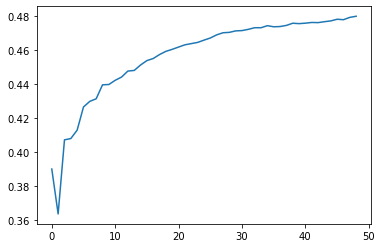

In [115]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv = 5).mean()
    val_score.append(score)
plt.plot(val_score)

On obtiendra les meilleures performances quant-on atteindra des nbr de voisin aux alentours de 49 - 50. 
Cependant on peut utiliser Validation Curve afin d'éviter d'ecrire la boucle for.

# Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve
model_vc = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model_vc, x_train, y_train, 'n_neighbors', k, cv=5)
plt.plot(val_score.mean(axis = 1))
plt.plot(train_score.mean(axis = 1))
plt.ylabel('score')
plt.xlabel('n_eighbors')
plt.legend()

C:\Users\lodia\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Grid Search CV nous permet de trouver le modèle avec les meilleurs hyper paramètres en comparant les différentes performances de combinaison grâce à la technique de cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  make_scorer
from sklearn.metrics import accuracy_score
param_grid={'n_neighbors': np.arange(1,50),
           'metric':['euclidean','manhattan']}

   #je recherche le meilleur model 
grid=GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5, scoring=make_scorer(accuracy_score))#

grid.fit(x_train, y_train)
print(grid.best_estimator_)
model_GS = grid.best_estimator_  #je prend le best modèle
predictions_GS = model_GS.predict(x_test)
accuracy = accuracy_score(predictions_GS, y_test)
print("accuracy : ", accuracy)

In [ ]:
gs_target_test = model_GS.predict(x_news1)
gs_target_test

In [ ]:
pred_GS=pd.DataFrame(gs_target_test)
football_GS=pd.read_csv("sample_submission.csv")
dataset_GS=pd.concat([football_GS["id"],pred_GS],axis=1 )
dataset_GS.columns=["id", "target"]
dataset_GS['target'] = dataset_GS['target'].replace(2.0, 'home')
dataset_GS['target'] = dataset_GS['target'].replace(0.0, 'away')
dataset_GS['target'] = dataset_GS['target'].replace(1.0, 'draw')
target_conv_GS = pd.get_dummies(dataset_GS['target'], drop_first = False)
datasub_GS=pd.concat([football_GS["id"],target_conv_GS],axis=1 )
#datasub = datasub.drop(3.0, axis = 1)
datasub_GS= datasub_GS[['id','home', 'draw', 'away']]
datasub_GS.to_csv("football_submission_GS.csv",index=False)

In [ ]:
datasub_GS.head()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Qualité du modèle testset:", confusion_matrix(y_test, model_GS.predict(x_test)))
print("Qualité du modèle trainset:", confusion_matrix(y_train, model_GS.predict(x_train)))

Outil de mesure très utile pour évaluer la qualité d'un modèle de classification 
==> Montre les erreurs de classement

In [ ]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model_GS, x_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv=5)
print(N)
plt.plot(N, train_score.mean(axis = 1), label = 'train')
plt.plot(N, val_score.mean(axis = 1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

Donc la performance n'évolue plus à partir du moment où on a plus 25000 points dans notre dataset, donc il est peut probable que le modèle évolue en ayant 30000, 40000 points.
Pas besoin de dépenser plus d'argent pour récolter de nouvelles données pour améliorer le modèle.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=5)
classifier.fit(x_train, y_train)
rf_target_pred = classifier.predict(x_test)
accuracy_score(rf_target_pred, y_test)

In [ ]:
rf_target_pred_test = classifier.predict(x_news1)
rf_target_pred_test

In [ ]:
pred_RF=pd.DataFrame(rf_target_pred_test)
football_RF=pd.read_csv("sample_submission.csv")
dataset_RF=pd.concat([football_RF["id"],pred_RF],axis=1 )
dataset_RF.columns=["id", "target"]
dataset_RF['target'] = dataset_RF['target'].replace(2.0, 'home')
dataset_RF['target'] = dataset_RF['target'].replace(0.0, 'away')
dataset_RF['target'] = dataset_RF['target'].replace(1.0, 'draw')
target_conv_RF = pd.get_dummies(dataset_RF['target'], drop_first = False)
datasub_RF=pd.concat([football_RF["id"],target_conv_RF],axis=1 )
datasub_RF= datasub_RF[['id','home', 'draw', 'away']]
datasub_RF.to_csv("football_submission_RF.csv",index=False)

In [ ]:
param_grid={'n_estimators':[100],
           'max_depth':[4]}    
    
    
   #je recherche le meilleur model 
grid=GridSearchCV(RandomForestClassifier(),param_grid,scoring=make_scorer(accuracy_score))#

grid.fit(x_train, y_train)
print(grid.best_estimator_)
model_GS_RF=grid.best_estimator_  #je prend le best modèle
predictions_GS_RF = model_GS_RF.predict(x_test)
accuracy = accuracy_score(predictions_GS_RF, y_test)
print("accuracy : ", accuracy)

In [ ]:
predictions_GS_RF_test = model_GS_RF.predict(x_news1)
predictions_GS_RF_test

In [ ]:
param_grid={'n_estimators': [100],
           'criterion':['gini','entropy']}

   #je recherche le meilleur model 
grid=GridSearchCV(RandomForestClassifier(),param_grid,scoring=make_scorer(accuracy_score))#

grid.fit(x_train, y_train)
print(grid.best_estimator_)
model_GS2_RF=grid.best_estimator_  #je prend le best modèle
predictions_GS2_RF = model_GS2_RF.predict(x_test)
accuracy = accuracy_score(predictions_GS2_RF, y_test)
print("accuracy : ", accuracy)

# Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf_model = DecisionTreeClassifier(criterion="gini", random_state=5,max_depth=3, min_samples_leaf=3)   
clf_model.fit(x_train,y_train)


In [ ]:
ad_target_predict = clf_model.predict(x_test)
ad_target_predict
accuracy_score(y_test,ad_target_predict)

In [ ]:
ad_target_predict_test = clf_model.predict(x_news1)
ad_target_predict_test

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(6)
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv = cv)

In [ ]:
cross_val_score(KNeighborsClassifier(), x_test, y_test, cv = cv)